<a href="https://colab.research.google.com/github/paulabhishek7777/Predictive-Maintenance-of-HVAC-s-Air-Handling-Units-AHU-s-/blob/main/MZVAV_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multizone Variable Air Volume

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Summer Internship IIITDM/MZVAV-1.csv")

In [ ]:
df

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,1/30/2017 0:00,68.00,55.04,32.00,68.00,75.20,0,0,0.0,0.0,0.0,0.0,0.00,0,0.04,0.00,0,0
1,1/30/2017 0:01,67.99,55.04,32.00,66.71,75.20,0,0,0.0,0.0,0.0,0.0,0.00,0,0.04,0.00,0,0
2,1/30/2017 0:02,67.99,55.04,-5.93,66.71,74.45,0,0,0.0,0.0,0.0,0.0,0.00,0,0.04,0.00,0,0
3,1/30/2017 0:03,67.99,55.04,-5.88,66.71,74.04,0,0,0.0,0.0,0.0,0.0,0.00,0,0.04,0.00,0,0
4,1/30/2017 0:04,67.99,55.04,-5.83,66.71,73.56,0,0,0.0,0.0,0.0,0.0,0.00,0,0.04,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272155,12/17/2017 23:55,55.04,55.04,17.89,62.52,62.53,1,1,1.0,1.0,0.0,0.0,0.01,0,0.04,0.11,0,1
272156,12/17/2017 23:56,55.04,55.04,17.87,62.52,62.53,1,1,1.0,1.0,0.0,0.0,0.01,0,0.04,0.11,0,1
272157,12/17/2017 23:57,55.04,55.04,17.85,62.52,62.53,1,1,1.0,1.0,0.0,0.0,0.01,0,0.04,0.11,0,1
272158,12/17/2017 23:58,55.04,55.04,17.83,62.52,62.52,1,1,1.0,1.0,0.0,0.0,0.01,0,0.04,0.11,0,1


In [ ]:
df= df.drop(['AHU: Supply Air Temperature Set Point',"AHU: Supply Air Duct Static Pressure","AHU: Supply Air Duct Static Pressure Set Point","Datetime"], axis = 1)

In [ ]:
df.shape

(272160, 14)

In [ ]:
df.head(10)

,AHU: Supply Air Temperature,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,Occupancy Mode Indicator,Fault Detection Ground Truth
0,68.00,32.00,68.00,75.20,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,67.99,32.00,66.71,75.20,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,67.99,-5.93,66.71,74.45,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,67.99,-5.88,66.71,74.04,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,67.99,-5.83,66.71,73.56,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
5,67.99,-5.78,66.71,73.13,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
6,67.99,-5.73,66.71,72.71,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
7,67.99,-5.67,66.71,72.30,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
8,67.99,-5.62,66.71,71.91,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
9,67.99,-5.57,66.71,71.52,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [ ]:
 df.isnull().sum()

AHU: Supply Air Temperature                 0
AHU: Outdoor Air Temperature                0
AHU: Mixed Air Temperature                  0
AHU: Return Air Temperature                 0
AHU: Supply Air Fan Status                  0
AHU: Return Air Fan Status                  0
AHU: Supply Air Fan Speed Control Signal    0
AHU: Return Air Fan Speed Control Signal    0
AHU: Outdoor Air Damper Control Signal      0
AHU: Return Air Damper Control Signal       0
AHU: Cooling Coil Valve Control Signal      0
AHU: Heating Coil Valve Control Signal      0
Occupancy Mode Indicator                    0
Fault Detection Ground Truth                0
dtype: int64

In [ ]:
df.dtypes

AHU: Supply Air Temperature                 float64
AHU: Outdoor Air Temperature                float64
AHU: Mixed Air Temperature                  float64
AHU: Return Air Temperature                 float64
AHU: Supply Air Fan Status                    int64
AHU: Return Air Fan Status                    int64
AHU: Supply Air Fan Speed Control Signal    float64
AHU: Return Air Fan Speed Control Signal    float64
AHU: Outdoor Air Damper Control Signal      float64
AHU: Return Air Damper Control Signal       float64
AHU: Cooling Coil Valve Control Signal      float64
AHU: Heating Coil Valve Control Signal        int64
Occupancy Mode Indicator                      int64
Fault Detection Ground Truth                  int64
dtype: object

In [ ]:
df

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,1/30/2017 0:00,68.00,55.04,32.00,68.00,75.20,0,0,0.0,0.0,0.0,0.0,0.00,0,0.04,0.00,0,0
1,1/30/2017 0:01,67.99,55.04,32.00,66.71,75.20,0,0,0.0,0.0,0.0,0.0,0.00,0,0.04,0.00,0,0
2,1/30/2017 0:02,67.99,55.04,-5.93,66.71,74.45,0,0,0.0,0.0,0.0,0.0,0.00,0,0.04,0.00,0,0
3,1/30/2017 0:03,67.99,55.04,-5.88,66.71,74.04,0,0,0.0,0.0,0.0,0.0,0.00,0,0.04,0.00,0,0
4,1/30/2017 0:04,67.99,55.04,-5.83,66.71,73.56,0,0,0.0,0.0,0.0,0.0,0.00,0,0.04,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272155,12/17/2017 23:55,55.04,55.04,17.89,62.52,62.53,1,1,1.0,1.0,0.0,0.0,0.01,0,0.04,0.11,0,1
272156,12/17/2017 23:56,55.04,55.04,17.87,62.52,62.53,1,1,1.0,1.0,0.0,0.0,0.01,0,0.04,0.11,0,1
272157,12/17/2017 23:57,55.04,55.04,17.85,62.52,62.53,1,1,1.0,1.0,0.0,0.0,0.01,0,0.04,0.11,0,1
272158,12/17/2017 23:58,55.04,55.04,17.83,62.52,62.52,1,1,1.0,1.0,0.0,0.0,0.01,0,0.04,0.11,0,1


In [ ]:
df["Datetime"] = pd.to_datetime(df["Datetime"])

In [ ]:
df.dtypes

Datetime                                          datetime64[ns]
AHU: Supply Air Temperature                              float64
AHU: Supply Air Temperature Set Point                    float64
AHU: Outdoor Air Temperature                             float64
AHU: Mixed Air Temperature                               float64
AHU: Return Air Temperature                              float64
AHU: Supply Air Fan Status                                 int64
AHU: Return Air Fan Status                                 int64
AHU: Supply Air Fan Speed Control Signal                 float64
AHU: Return Air Fan Speed Control Signal                 float64
AHU: Outdoor Air Damper Control Signal                   float64
AHU: Return Air Damper Control Signal                    float64
AHU: Cooling Coil Valve Control Signal                   float64
AHU: Heating Coil Valve Control Signal                     int64
AHU: Supply Air Duct Static Pressure Set Point           float64
AHU: Supply Air Duct Stat

### Graphs

In [ ]:
df[["Fault Detection Ground Truth"]].value_counts()

Fault Detection Ground Truth
1                               233280
0                                38880
dtype: int64

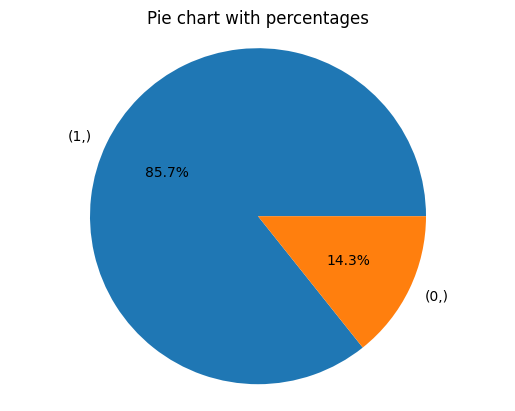

In [ ]:
fd = "Fault Detection Ground Truth"
vc = df[["Fault Detection Ground Truth"]].value_counts()
labels = vc.index.tolist()
values = vc.values.tolist()

fig, ax = plt.subplots()
ax.pie(values, labels = labels, autopct =  "%1.1f%%")
ax.axis('equal')

ax.set_title("Pie chart with percentages")

plt.show()

In [ ]:
for i in df.columns:
  print(i)
  print(df[i].nunique())

Datetime
272160
AHU: Supply Air Temperature
1322
AHU: Supply Air Temperature Set Point
1
AHU: Outdoor Air Temperature
10226
AHU: Mixed Air Temperature
2631
AHU: Return Air Temperature
1786
AHU: Supply Air Fan Status
2
AHU: Return Air Fan Status
2
AHU: Supply Air Fan Speed Control Signal
18
AHU: Return Air Fan Speed Control Signal
18
AHU: Outdoor Air Damper Control Signal  
12212
AHU: Return Air Damper Control Signal
2
AHU: Cooling Coil Valve Control Signal
61
AHU: Heating Coil Valve Control Signal
2
AHU: Supply Air Duct Static Pressure Set Point
1
AHU: Supply Air Duct Static Pressure
15
Occupancy Mode Indicator
2
Fault Detection Ground Truth
2


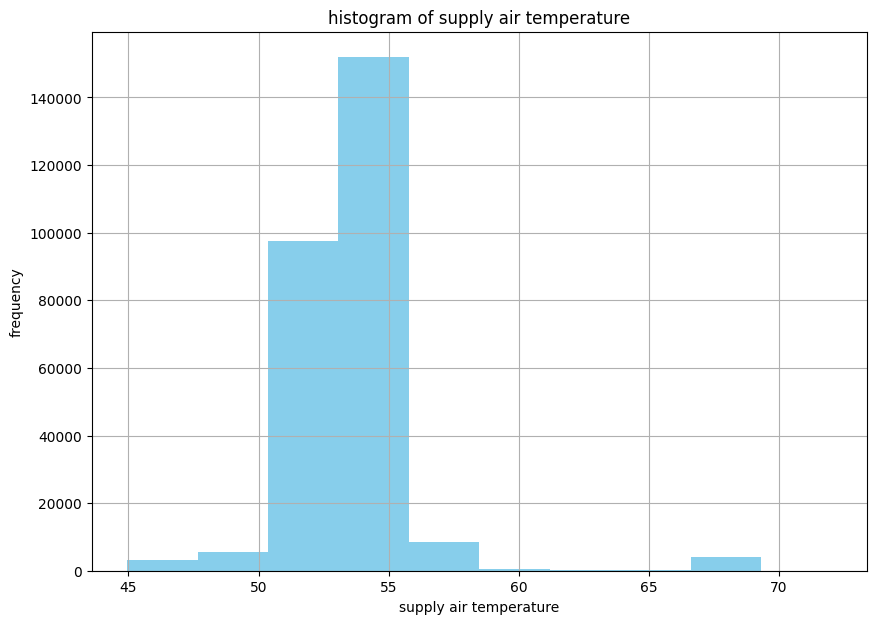

In [ ]:
df["AHU: Supply Air Temperature"].hist(color = "skyblue", figsize = (10,7))
plt.title("histogram of supply air temperature")
plt.xlabel("supply air temperature")
plt.ylabel("frequency")
plt.savefig("hist_temp")

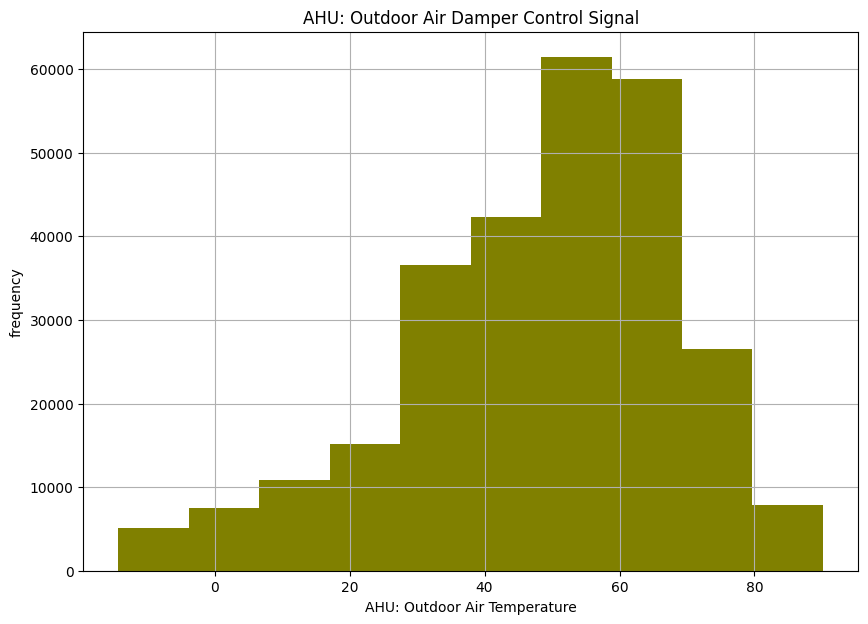

In [ ]:
df["AHU: Outdoor Air Temperature"].hist(color = "olive", figsize = (10,7))
plt.title("AHU: Outdoor Air Damper Control Signal")
plt.xlabel("AHU: Outdoor Air Temperature")
plt.ylabel("frequency")
plt.savefig("hist_temp")

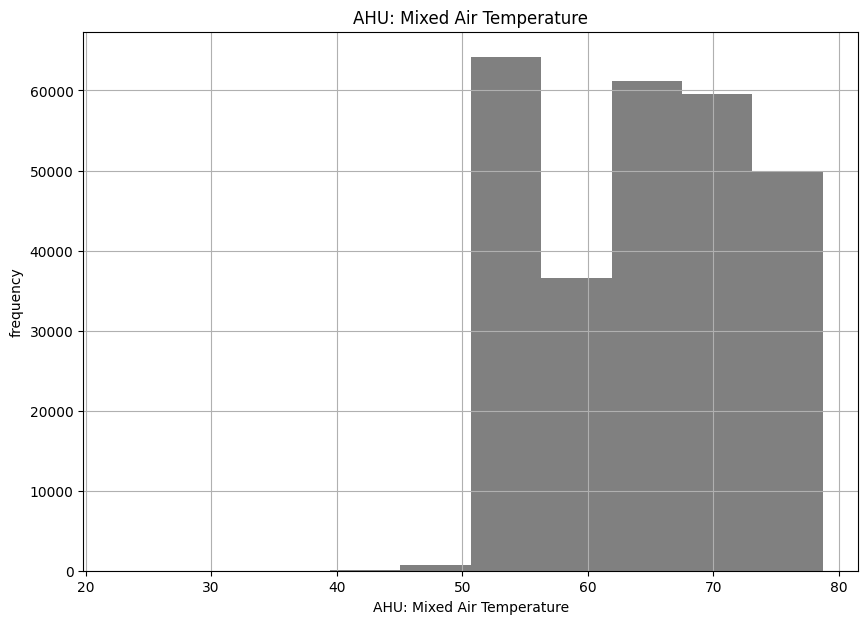

In [ ]:
df["AHU: Mixed Air Temperature"].hist(color = "grey", figsize = (10,7))
plt.title("AHU: Mixed Air Temperature")
plt.xlabel("AHU: Mixed Air Temperature")
plt.ylabel("frequency")
plt.savefig("hist_temp")

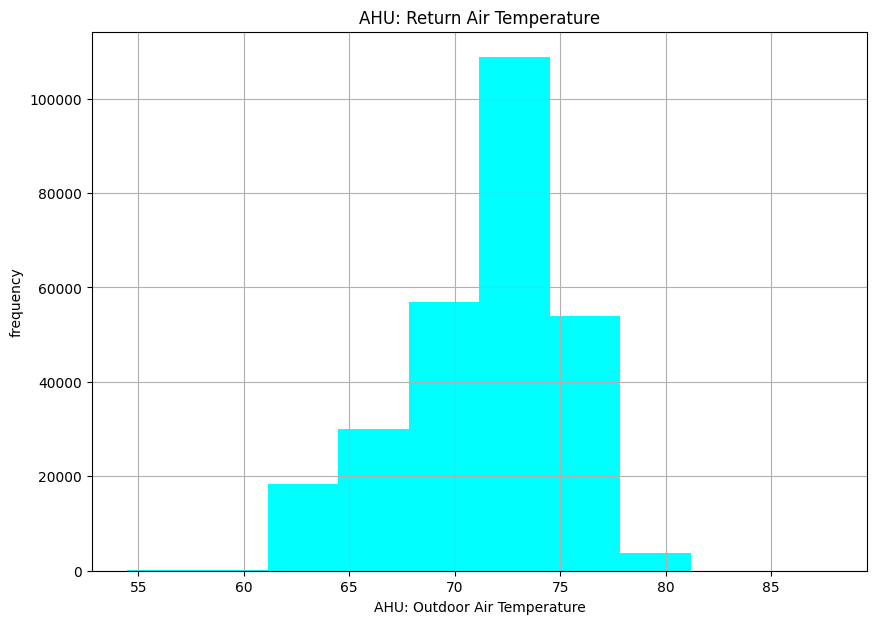

In [ ]:
df["AHU: Return Air Temperature"].hist(color = "cyan", figsize = (10,7))
plt.title("AHU: Return Air Temperature")
plt.xlabel("AHU: Outdoor Air Temperature")
plt.ylabel("frequency")
plt.savefig("hist_temp")

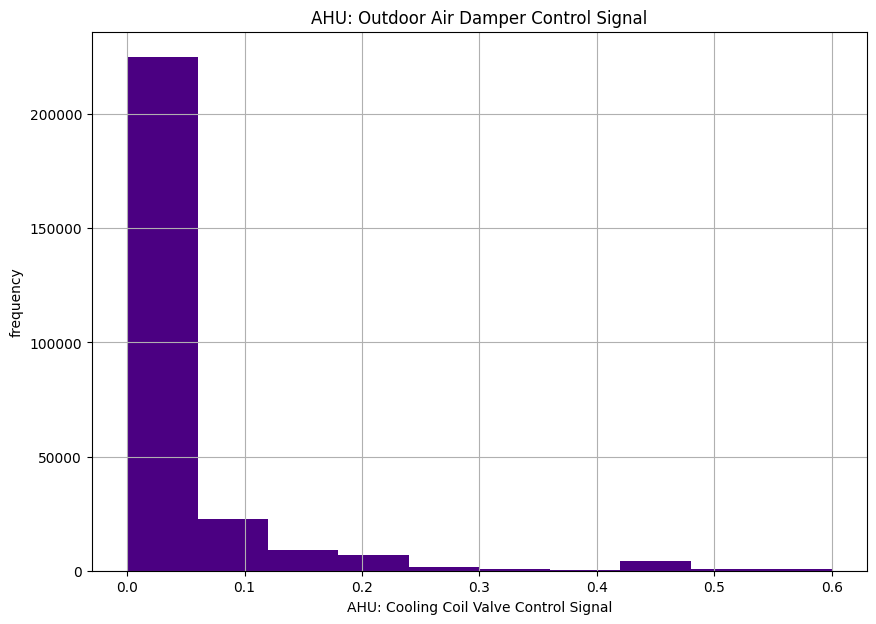

In [ ]:
df["AHU: Cooling Coil Valve Control Signal"].hist(color = "indigo", figsize = (10,7))
plt.title("AHU: Outdoor Air Damper Control Signal")
plt.xlabel("AHU: Cooling Coil Valve Control Signal")
plt.ylabel("frequency")
plt.savefig("hist_temp")

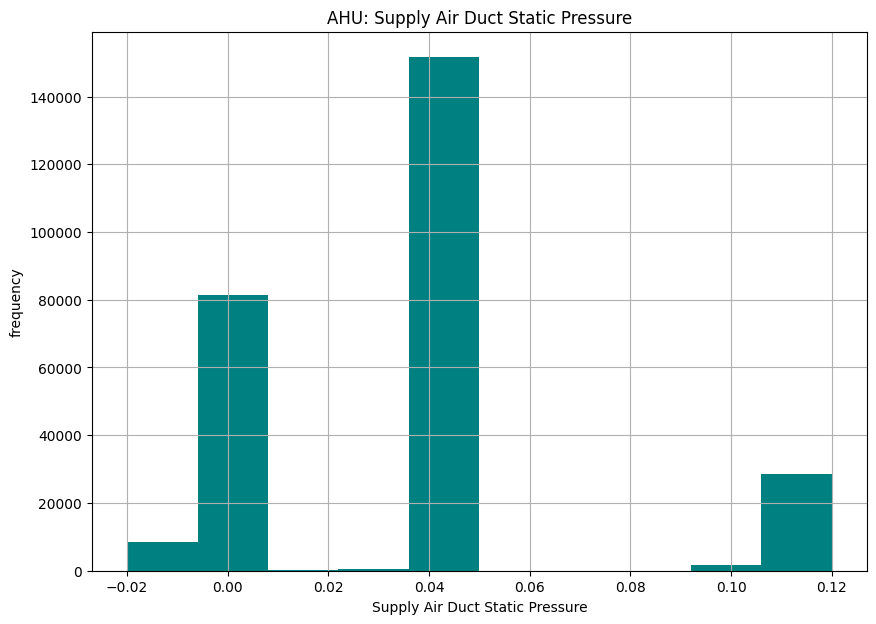

In [ ]:
df["AHU: Supply Air Duct Static Pressure"].hist(color = "teal", figsize = (10,7))
plt.title("AHU: Supply Air Duct Static Pressure")
plt.xlabel("Supply Air Duct Static Pressure")
plt.ylabel("frequency")
plt.savefig("hist_temp")

In [ ]:
for i in df.columns:
  print(i)
  print(df[i].nunique())

Datetime
272160
AHU: Supply Air Temperature
1322
AHU: Supply Air Temperature Set Point
1
AHU: Outdoor Air Temperature
10226
AHU: Mixed Air Temperature
2631
AHU: Return Air Temperature
1786
AHU: Supply Air Fan Status
2
AHU: Return Air Fan Status
2
AHU: Supply Air Fan Speed Control Signal
18
AHU: Return Air Fan Speed Control Signal
18
AHU: Outdoor Air Damper Control Signal  
12212
AHU: Return Air Damper Control Signal
2
AHU: Cooling Coil Valve Control Signal
61
AHU: Heating Coil Valve Control Signal
2
AHU: Supply Air Duct Static Pressure Set Point
1
AHU: Supply Air Duct Static Pressure
15
Occupancy Mode Indicator
2
Fault Detection Ground Truth
2


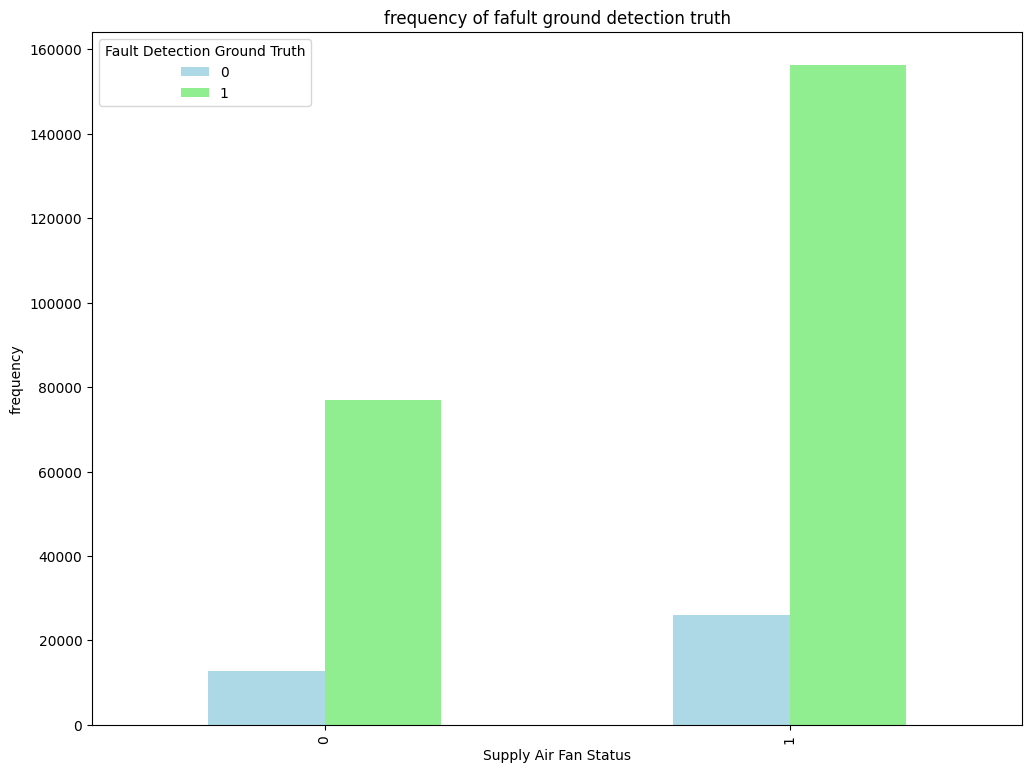

In [ ]:
colors = ['lightblue', 'lightgreen']
pd.crosstab(df["AHU: Supply Air Fan Status"],df["Fault Detection Ground Truth"]).plot(kind = 'bar',figsize =(12,9),color = colors)
plt.title("frequency of fafult ground detection truth")
plt.xlabel("Supply Air Fan Status")
plt.ylabel("frequency")
plt.savefig("fre_fault_")

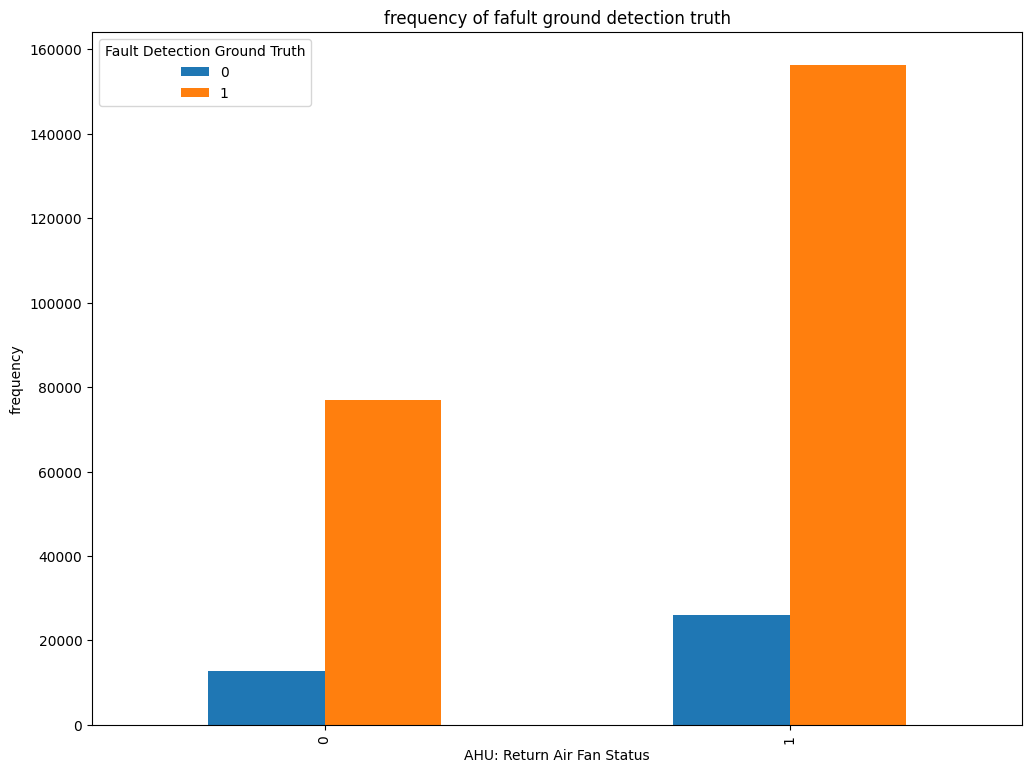

In [ ]:
pd.crosstab(df["AHU: Return Air Fan Status"],df["Fault Detection Ground Truth"]).plot(kind = 'bar',figsize =(12,9))
plt.title("frequency of fafult ground detection truth")
plt.xlabel("AHU: Return Air Fan Status")
plt.ylabel("frequency")
plt.savefig("fre_fault_")

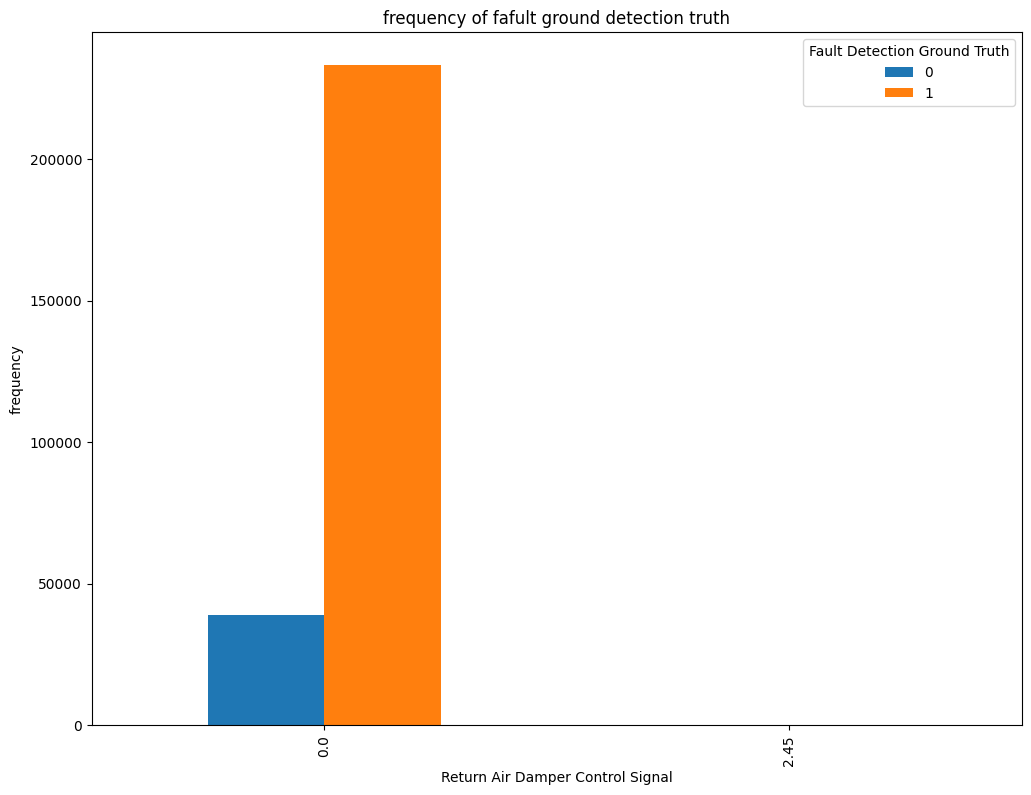

In [ ]:
pd.crosstab(df["AHU: Return Air Damper Control Signal"],df["Fault Detection Ground Truth"]).plot(kind = 'bar',figsize =(12,9))
plt.title("frequency of fafult ground detection truth")
plt.xlabel("Return Air Damper Control Signal")
plt.ylabel("frequency")
plt.savefig("fre_fault_")

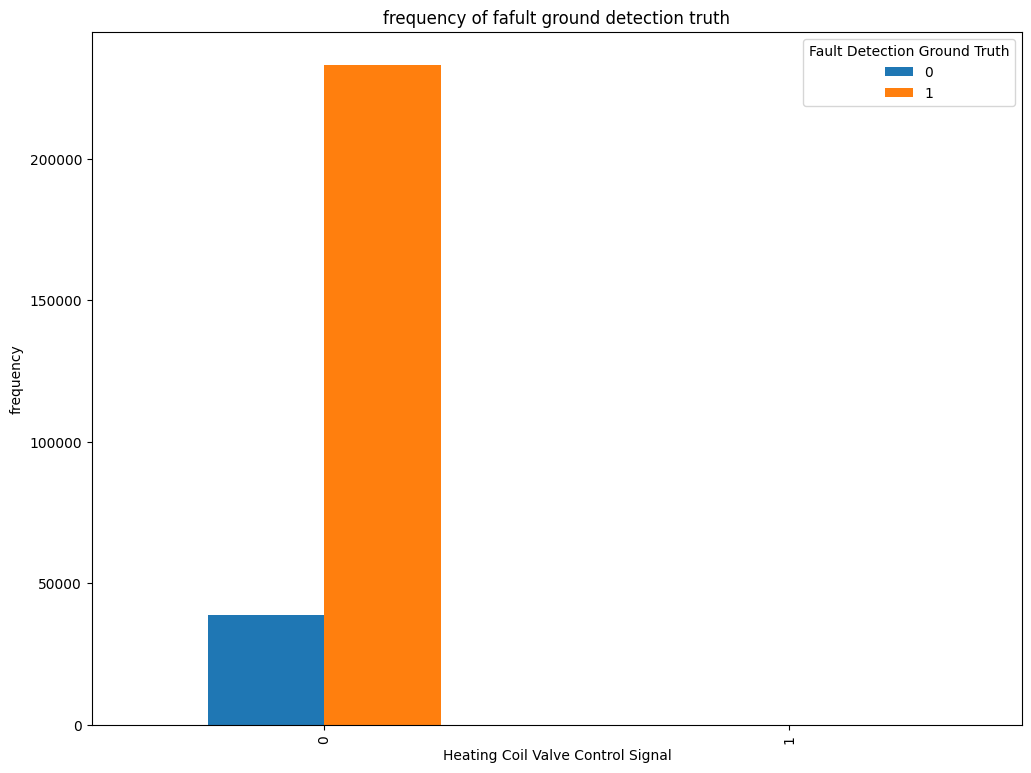

In [ ]:
pd.crosstab(df["AHU: Heating Coil Valve Control Signal"],df["Fault Detection Ground Truth"]).plot(kind = 'bar',figsize =(12,9))
plt.title("frequency of fafult ground detection truth")
plt.xlabel("Heating Coil Valve Control Signal")
plt.ylabel("frequency")
plt.savefig("fre_fault_")

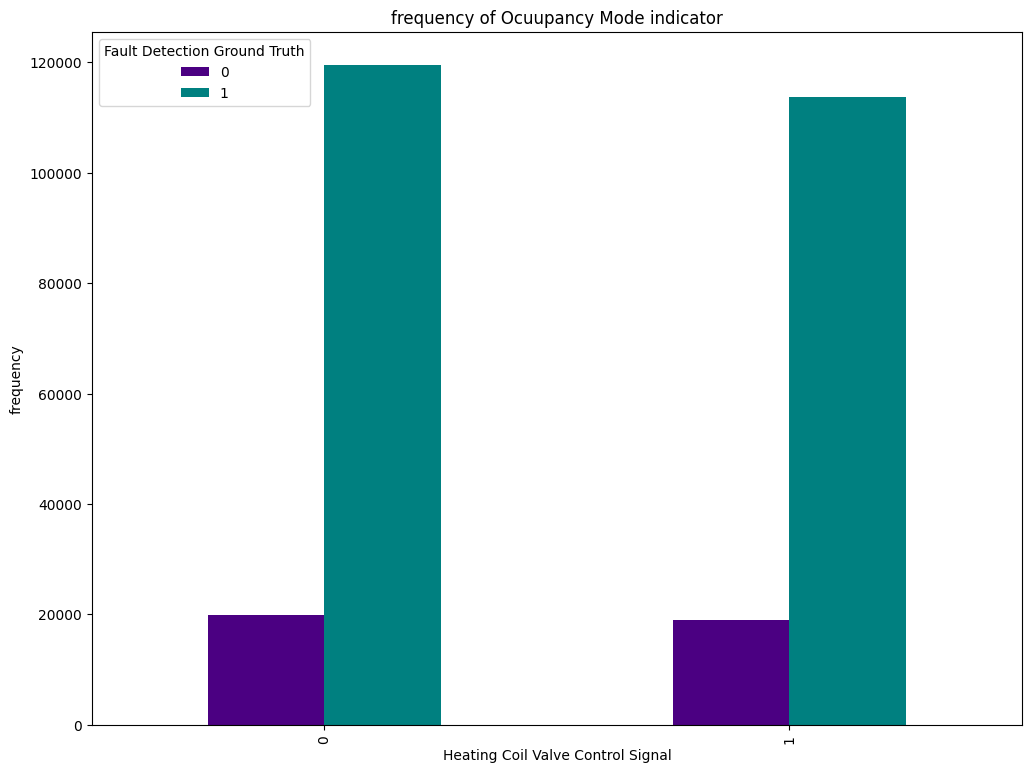

In [ ]:
colors = ["indigo", "teal"]
pd.crosstab(df["Occupancy Mode Indicator"],df["Fault Detection Ground Truth"]).plot(kind = 'bar',figsize =(12,9), color= colors)
plt.title("frequency of Ocuupancy Mode indicator")
plt.xlabel("Heating Coil Valve Control Signal")
plt.ylabel("frequency")
plt.savefig("fre_fault_")

In [ ]:
df.dtypes

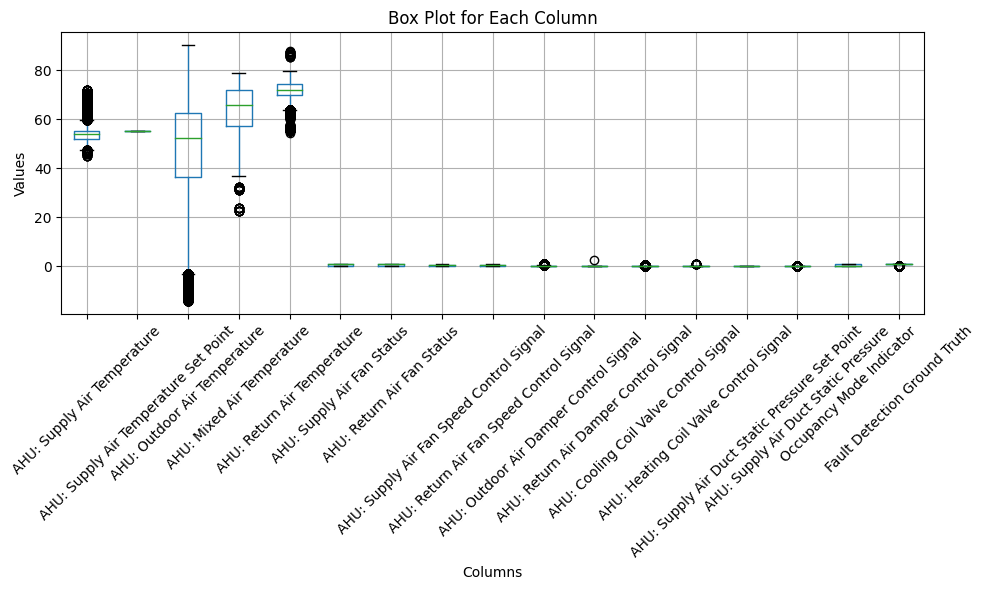

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot(ax=ax)

# Set the x-axis label
plt.xlabel('Columns')

# Set the y-axis label
plt.ylabel('Values')

# Set the title of the plot
plt.title('Box Plot for Each Column')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
df


,Datetime,AHU: Supply Air Temperature,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,Occupancy Mode Indicator,Fault Detection Ground Truth
0,1/30/2017 0:00,68.00,32.00,68.00,75.20,0,0,0.0,0.0,0.0,0.0,0.00,0,0,0
1,1/30/2017 0:01,67.99,32.00,66.71,75.20,0,0,0.0,0.0,0.0,0.0,0.00,0,0,0
2,1/30/2017 0:02,67.99,-5.93,66.71,74.45,0,0,0.0,0.0,0.0,0.0,0.00,0,0,0
3,1/30/2017 0:03,67.99,-5.88,66.71,74.04,0,0,0.0,0.0,0.0,0.0,0.00,0,0,0
4,1/30/2017 0:04,67.99,-5.83,66.71,73.56,0,0,0.0,0.0,0.0,0.0,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272155,12/17/2017 23:55,55.04,17.89,62.52,62.53,1,1,1.0,1.0,0.0,0.0,0.01,0,0,1
272156,12/17/2017 23:56,55.04,17.87,62.52,62.53,1,1,1.0,1.0,0.0,0.0,0.01,0,0,1
272157,12/17/2017 23:57,55.04,17.85,62.52,62.53,1,1,1.0,1.0,0.0,0.0,0.01,0,0,1
272158,12/17/2017 23:58,55.04,17.83,62.52,62.52,1,1,1.0,1.0,0.0,0.0,0.01,0,0,1


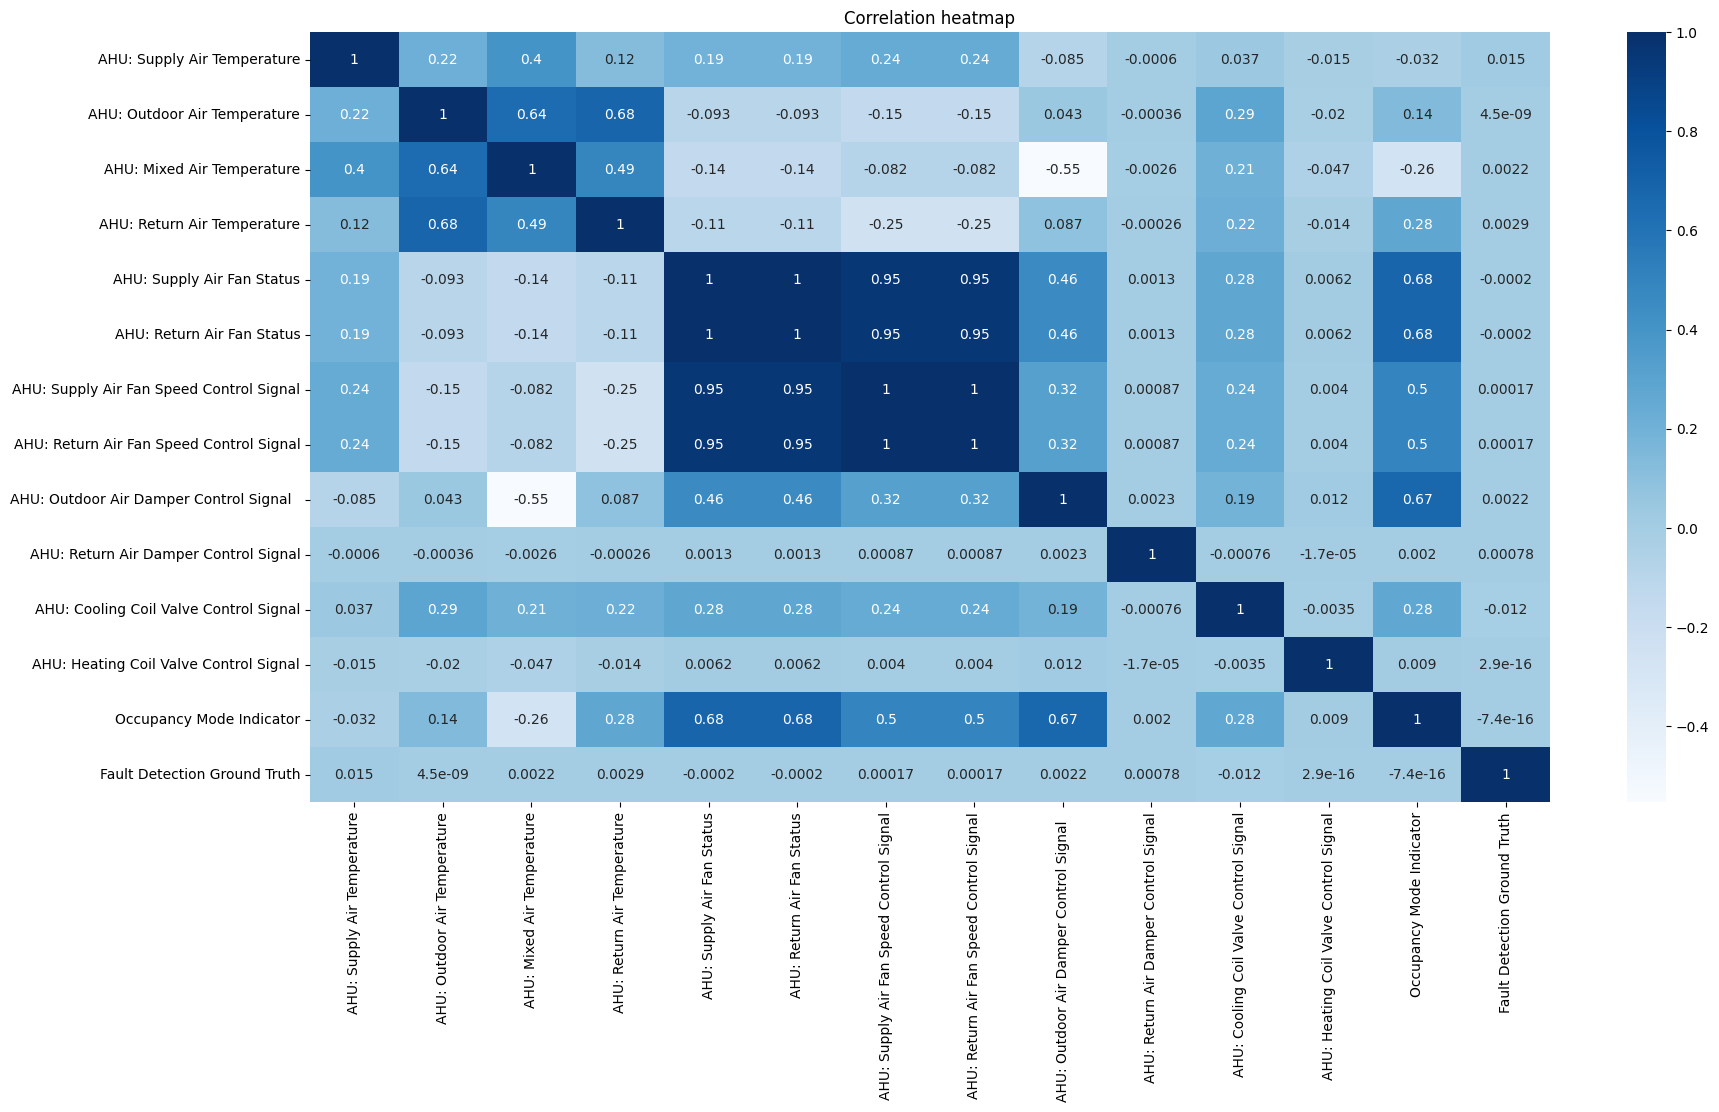

In [ ]:
plt.figure(figsize = (20,10))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix,cbar = True, annot = True, cmap = "Blues")
plt.title('Correlation heatmap')
plt.show()

In [ ]:
df.columns

Index(['Datetime', 'AHU: Supply Air Temperature',
       'AHU: Outdoor Air Temperature', 'AHU: Mixed Air Temperature',
       'AHU: Return Air Temperature', 'AHU: Supply Air Fan Status',
       'AHU: Return Air Fan Status',
       'AHU: Supply Air Fan Speed Control Signal',
       'AHU: Return Air Fan Speed Control Signal',
       'AHU: Outdoor Air Damper Control Signal  ',
       'AHU: Return Air Damper Control Signal',
       'AHU: Cooling Coil Valve Control Signal',
       'AHU: Heating Coil Valve Control Signal', 'Occupancy Mode Indicator',
       'Fault Detection Ground Truth'],
      dtype='object')

### Algo part

In [ ]:
x = df.drop(['Fault Detection Ground Truth'], axis = 1)
y = df["Fault Detection Ground Truth"]

In [ ]:
x

,AHU: Supply Air Temperature,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,Occupancy Mode Indicator
0,68.00,32.00,68.00,75.20,0,0,0.0,0.0,0.0,0.0,0.00,0,0
1,67.99,32.00,66.71,75.20,0,0,0.0,0.0,0.0,0.0,0.00,0,0
2,67.99,-5.93,66.71,74.45,0,0,0.0,0.0,0.0,0.0,0.00,0,0
3,67.99,-5.88,66.71,74.04,0,0,0.0,0.0,0.0,0.0,0.00,0,0
4,67.99,-5.83,66.71,73.56,0,0,0.0,0.0,0.0,0.0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272155,55.04,17.89,62.52,62.53,1,1,1.0,1.0,0.0,0.0,0.01,0,0
272156,55.04,17.87,62.52,62.53,1,1,1.0,1.0,0.0,0.0,0.01,0,0
272157,55.04,17.85,62.52,62.53,1,1,1.0,1.0,0.0,0.0,0.01,0,0
272158,55.04,17.83,62.52,62.52,1,1,1.0,1.0,0.0,0.0,0.01,0,0


In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
272155    1
272156    1
272157    1
272158    1
272159    1
Name: Fault Detection Ground Truth, Length: 272160, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)


In [ ]:
b_df

## ML Algorithms

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy" , acc)

Accuracy 0.9891791593180482


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 7374   319]
 [  270 46469]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7693
           1       0.99      0.99      0.99     46739

    accuracy                           0.99     54432
   macro avg       0.98      0.98      0.98     54432
weighted avg       0.99      0.99      0.99     54432



### Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
acc  = accuracy_score(y_test,y_pred)
print("Accuracy : ", acc)

Accuracy :  0.9890321869488536


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 7181   512]
 [   85 46654]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      7693
           1       0.99      1.00      0.99     46739

    accuracy                           0.99     54432
   macro avg       0.99      0.97      0.98     54432
weighted avg       0.99      0.99      0.99     54432



### Random forest 3

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters
n_estimators = 100  # Number of trees in the forest
max_depth = 10  # Maximum depth of each tree
min_samples_split = 2  # Minimum number of samples required to split a node
max_features = "sqrt"  # Number of features to consider for the best split ("sqrt" for square root of total features)

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=n_estimators,
                                       max_depth=max_depth,
                                       min_samples_split=min_samples_split,
                                       max_features=max_features)

# Train the model
rf_classifier.fit(x_train, y_train)  # Assuming X_train contains the training features and y_train contains the corresponding labels

# Predict on the validation or test set
y_pred = rf_classifier.predict(x_test)  # Assuming X_val contains the validation features

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)  # Assuming y_val contains the validation labels

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8746876837154615


### Random forest 4

In [ ]:
# Define the hyperparameters
n_estimators = 200  # Number of trees in the forest
max_depth = 20  # Maximum depth of each tree
min_samples_split = 2  # Minimum number of samples required to split a node
max_features = "sqrt"  # Number of features to consider for the best split ("sqrt" for square root of total features)

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=n_estimators,
                                       max_depth=max_depth,
                                       min_samples_split=min_samples_split,
                                       max_features=max_features)

# Train the model
rf_classifier.fit(x_train, y_train)  # Assuming X_train contains the training features and y_train contains the corresponding labels

# Predict on the validation or test set
y_pred = rf_classifier.predict(x_test)  # Assuming X_val contains the validation features

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)  # Assuming y_val contains the validation labels

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9443158436213992


### Random forest 5

In [ ]:
# Define the hyperparameters
n_estimators = 300  # Number of trees in the forest
max_depth = 30  # Maximum depth of each tree
min_samples_split = 2  # Minimum number of samples required to split a node
max_features = "sqrt"  # Number of features to consider for the best split ("sqrt" for square root of total features)

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=n_estimators,
                                       max_depth=max_depth,
                                       min_samples_split=min_samples_split,
                                       max_features=max_features)

# Train the model
rf_classifier.fit(x_train, y_train)  # Assuming X_train contains the training features and y_train contains the corresponding labels

# Predict on the validation or test set
y_pred = rf_classifier.predict(x_test)  # Assuming X_val contains the validation features

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)  # Assuming y_val contains the validation labels

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9868276014109347


### Random Forest 5

In [ ]:
# Define the hyperparameters
n_estimators = 400  # Number of trees in the forest
max_depth = 40  # Maximum depth of each tree
min_samples_split = 2  # Minimum number of samples required to split a node
max_features = "sqrt"  # Number of features to consider for the best split ("sqrt" for square root of total features)

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=n_estimators,
                                       max_depth=max_depth,
                                       min_samples_split=min_samples_split,
                                       max_features=max_features)

# Train the model
rf_classifier.fit(x_train, y_train)  # Assuming X_train contains the training features and y_train contains the corresponding labels

# Predict on the validation or test set
y_pred = rf_classifier.predict(x_test)  # Assuming X_val contains the validation features

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)  # Assuming y_val contains the validation labels

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9894363609641388


### K- fold random forest

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define the number of folds (k)
k = 5

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Create the KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(rf_classifier, x, y, cv=kf)

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(scores):
    print("Fold", fold+1, "Accuracy:", accuracy)

# Calculate the mean accuracy across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

Fold 1 Accuracy: 0.9890689300411523
Fold 2 Accuracy: 0.9890321869488536
Fold 3 Accuracy: 0.9880584950029394
Fold 4 Accuracy: 0.9887198706643151
Fold 5 Accuracy: 0.9881870958259847
Mean Accuracy: 0.988613315696649


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define the number of folds (k)
k = 5

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Create the KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(rf_classifier, x, y, cv=kf)

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(scores):
    print("Fold", fold+1, "Accuracy:", accuracy)

# Calculate the mean accuracy across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

Fold 1 Accuracy: 0.9887198706643151
Fold 2 Accuracy: 0.9887198706643151
Fold 3 Accuracy: 0.987746178718401
Fold 4 Accuracy: 0.9887933568489125
Fold 5 Accuracy: 0.9889219576719577
Mean Accuracy: 0.9885802469135804


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define the number of folds (k)
k = 10

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Create the KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(rf_classifier, x, y, cv=kf)

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(scores):
    print("Fold", fold+1, "Accuracy:", accuracy)

# Calculate the mean accuracy across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

Fold 1 Accuracy: 0.9890505584950029
Fold 2 Accuracy: 0.9902630805408583
Fold 3 Accuracy: 0.9892710170487948
Fold 4 Accuracy: 0.9902630805408583
Fold 5 Accuracy: 0.989564961787184
Fold 6 Accuracy: 0.9887933568489125
Fold 7 Accuracy: 0.9892710170487948
Fold 8 Accuracy: 0.9899691358024691
Fold 9 Accuracy: 0.9902263374485597
Fold 10 Accuracy: 0.9889770723104057
Mean Accuracy: 0.989564961787184


### ROC curve

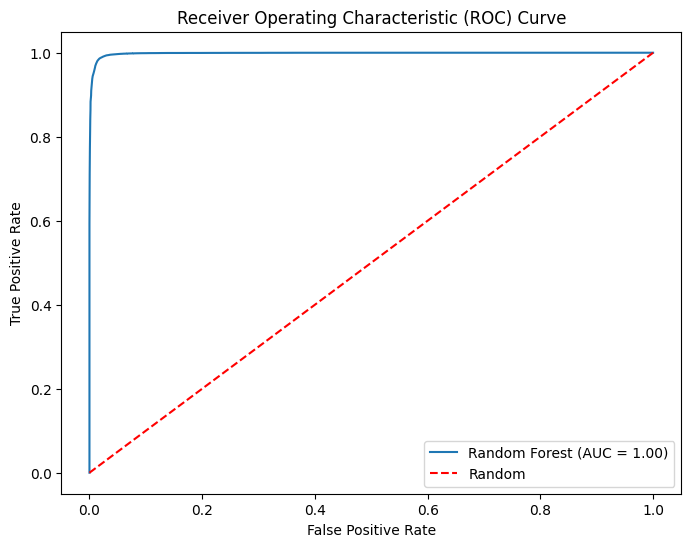

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the classifier
clf.fit(x_train, y_train)

# Predict probabilities for the test set
y_prob = clf.predict_proba(x_test)[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

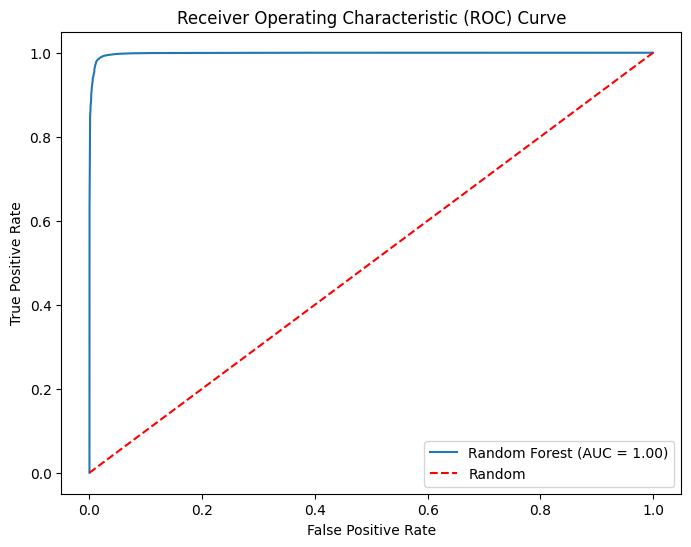

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=200)

# Train the classifier
clf.fit(x_train, y_train)

# Predict probabilities for the test set
y_prob = clf.predict_proba(x_test)[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

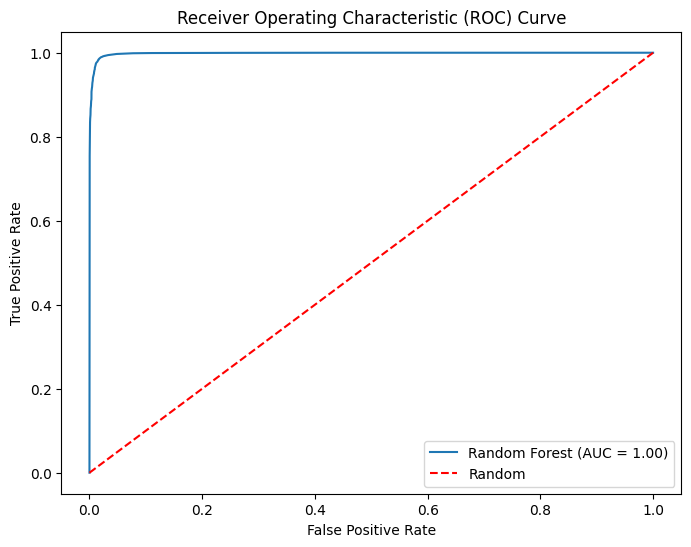

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=300)

# Train the classifier
clf.fit(x_train, y_train)

# Predict probabilities for the test set
y_prob = clf.predict_proba(x_test)[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Random select Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

# Define the hyperparameter search space
param_dist = {
    'n_estimators': sp_randint(100, 1000),
    'max_depth': sp_randint(5, 20),
    'min_samples_split': sp_randint(2, 10),
    'max_features': ['sqrt', 'log2']
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    random_state=42
)

# Perform hyperparameter tuning on a subset of the data
random_search.fit(x_train_subset, y_train_subset)  # Assuming X_train_subset and y_train_subset are subsets of the large dataset

# Get the best hyperparameters and their associated performance
best_params = random_search.best_params_
best_score = random_search.best_score_

# Retrain the model on the full dataset with the best hyperparameters
best_model = RandomForestClassifier(**best_params)
best_model.fit(x_train, y_train)  # Assuming X_train and y_train are the full datasets

# Evaluate the model on the test set
accuracy = best_model.score(x_test, y_test)  # Assuming X_test and y_test are the test datasets

# Print the best hyperparameters and their performance
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Test Accuracy:", accuracy)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

param_dist = {
    'n_estimators': [100, 200, 300],  # Example: different number of estimators
    'max_depth': [5, 10, 15],  # Example: different maximum depths
    'min_samples_split': [2, 5, 10],  # Example: different minimum samples to split
    'max_features': ['sqrt', 'log2']  # Example: different options for max features
}

# Create the RandomizedSearchCV object
rf_classifier = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1)

# Perform random search on the subset of the data
random_search.fit(x_test, y_test)

# Retrieve the best hyperparameters and their associated performance
best_params = random_search.best_params_
best_score = random_search.best_score_

# Retrain the model using the best hyperparameters on the full dataset
rf_best = RandomForestClassifier(**best_params)
rf_best.fit(x, y)

# Evaluate the model on the test set (assuming you have a separate test set)
y_pred = rf_best.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

In [ ]:
print(best_params)

### Grid search random forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

# Assuming you have your features (X) and labels (y) ready
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters and their distributions to sample from
param_distributions = {
    'n_estimators': np.arange(50, 200, 10),           # Number of trees in the forest
    'max_depth': np.append(np.arange(5, 21, 5), None), # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]                     # Minimum number of samples required to be at a leaf node
}

# Define the scoring metric (you can choose other metrics as well)
scorer = make_scorer(accuracy_score)

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(rf_classifier, param_distributions, n_iter=20, scoring=scorer, cv=5, n_jobs=-1)
random_search.fit(x_train, y_train)

# Get the best hyperparameters and corresponding model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Test the best model on the test set
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Test Accuracy with Best Model:", accuracy)

Best Hyperparameters: {'n_estimators': 140, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None}
Test Accuracy with Best Model: 0.9831716637272193


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

# Assuming you have your features (X) and labels (y) ready
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
subset_size = 10000  # Set the desired subset size
x_subset, _, y_subset, _ = train_test_split(x_train, y_train, train_size=subset_size, random_state=42)

# Define the classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],       # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]         # Minimum number of samples required to be at a leaf node
}

# Define the scoring metric (you can choose other metrics as well)
scorer = make_scorer(accuracy_score)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, scoring=scorer, cv=5)
grid_search.fit(x_subset, y_subset)

# Get the best hyperparameters and corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Test the best model on the test set
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Test Accuracy with Best Model:", accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy with Best Model: 0.9107142857142857


### Random Search

### KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy : ", acc)

Accuracy :  0.985762051734274


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 7248   445]
 [  330 46409]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7693
           1       0.99      0.99      0.99     46739

    accuracy                           0.99     54432
   macro avg       0.97      0.97      0.97     54432
weighted avg       0.99      0.99      0.99     54432



### AdaBoost

In [ ]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy : ", acc)

Accuracy :  0.8586676954732511


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[    0  7693]
 [    0 46739]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7693
           1       0.86      1.00      0.92     46739

    accuracy                           0.86     54432
   macro avg       0.43      0.50      0.46     54432
weighted avg       0.74      0.86      0.79     54432



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###  Extra Tree Classifier

In [ ]:
ext = ExtraTreesClassifier()
ext.fit(x_train,y_train)
y_pred = ext.predict(x_test)
acc= accuracy_score(y_test,y_pred)
print("Accuracy", acc)

Accuracy 0.9818672839506173


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 6867   826]
 [  161 46578]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      7693
           1       0.98      1.00      0.99     46739

    accuracy                           0.98     54432
   macro avg       0.98      0.94      0.96     54432
weighted avg       0.98      0.98      0.98     54432



### SGDClassifier

In [ ]:
sgd = SGDClassifier()
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_test)
acc= accuracy_score(y_test,y_pred)
print("Accuracy", acc)

Accuracy 0.8586676954732511


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[    0  7693]
 [    0 46739]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7693
           1       0.86      1.00      0.92     46739

    accuracy                           0.86     54432
   macro avg       0.43      0.50      0.46     54432
weighted avg       0.74      0.86      0.79     54432



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### MLPClassifier

In [ ]:
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)
acc= accuracy_score(y_test,y_pred)
print("Accuracy", acc)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy 0.871821722516167


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  784  6909]
 [   68 46671]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.10      0.18      7693
           1       0.87      1.00      0.93     46739

    accuracy                           0.87     54432
   macro avg       0.90      0.55      0.56     54432
weighted avg       0.88      0.87      0.82     54432



### GaussianNB

In [ ]:
gauss = GaussianNB()
gauss.fit(x_train,y_train)
y_pred = gauss.predict(x_test)
acc= accuracy_score(y_test,y_pred)
print("Accuracy", acc)

Accuracy 0.1413506760728983


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 7692     1]
 [46737     2]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.14      1.00      0.25      7693
           1       0.67      0.00      0.00     46739

    accuracy                           0.14     54432
   macro avg       0.40      0.50      0.12     54432
weighted avg       0.59      0.14      0.04     54432



## Train Test 75 and 25

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25 random_state = 42)


### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy" , acc)

Accuracy 0.9890689300411523


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
print(classification_report(y_test, y_pred))

### Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = dt.predict(x_test)
acc  = accuracy_score(y_test,y_pred)
print("Accuracy : ", acc)

Accuracy :  0.9890689300411523


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
print(classification_report(y_test, y_pred))

### KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy : ", acc)

Accuracy :  0.985762051734274


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
print(classification_report(y_test, y_pred))

### AdaBoost

In [ ]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy : ", acc)

Accuracy :  0.8586676954732511


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
print(classification_report(y_test, y_pred))

###  Extra Tree Classifier

In [ ]:
ext = ExtraTreesClassifier()
ext.fit(x_train,y_train)
y_pred = ext.predict(x_test)
acc= accuracy_score(y_test,y_pred)
print("Accuracy", acc)

Accuracy 0.9812793944738389


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
print(classification_report(y_test, y_pred))

### SGDClassifier

In [ ]:
sgd = SGDClassifier()
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_test)
acc= accuracy_score(y_test,y_pred)
print("Accuracy", acc)

Accuracy 0.8586676954732511


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
print(classification_report(y_test, y_pred))

### MLPClassifier

In [ ]:
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)
acc= accuracy_score(y_test,y_pred)
print("Accuracy", acc)

Accuracy 0.8641975308641975


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
print(classification_report(y_test, y_pred))

### GaussianNB

In [ ]:
gauss = GaussianNB()
gauss.fit(x_train,y_train)
y_pred = gauss.predict(x_test)
acc= accuracy_score(y_test,y_pred)
print("Accuracy", acc)

Accuracy 0.1413506760728983


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
print(classification_report(y_test, y_pred))

## Train Test 70 and 30

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)


### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy" , acc)

Accuracy 0.9876053301979227


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[11090   545]
 [  467 69546]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     11635
           1       0.99      0.99      0.99     70013

    accuracy                           0.99     81648
   macro avg       0.98      0.97      0.97     81648
weighted avg       0.99      0.99      0.99     81648



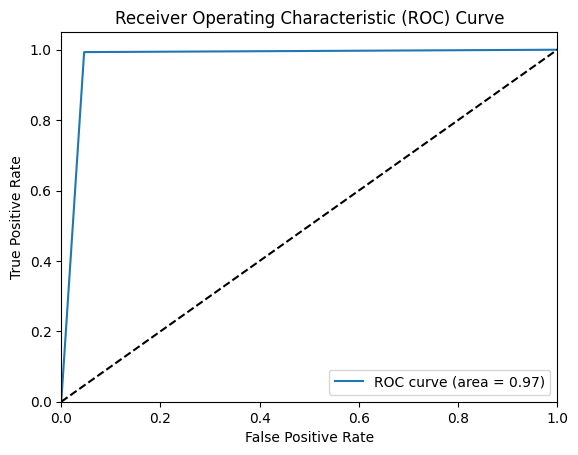

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have the true labels (y_true) and predicted probabilities (y_pred) for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

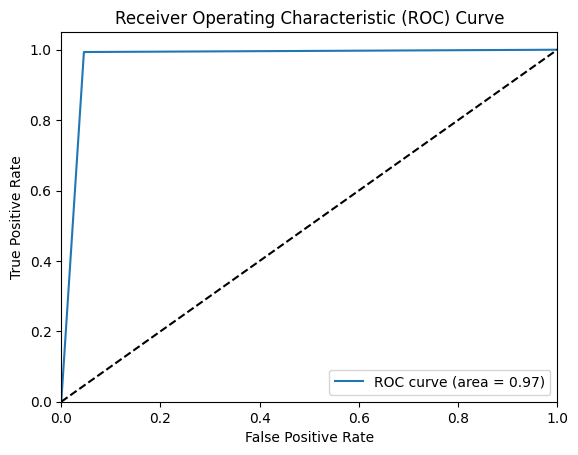

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

# Get predicted probabilities for the positive class
y_pred_prob = classifier.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = dt.predict(x_test)
acc  = accuracy_score(y_test,y_pred)
print("Accuracy : ", acc)

Accuracy :  0.9890689300411523


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
print(classification_report(y_test, y_pred))

### KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy : ", acc)

Accuracy :  0.985762051734274


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
print(classification_report(y_test, y_pred))

### AdaBoost

In [ ]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy : ", acc)

Accuracy :  0.8586676954732511


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
# Create an AdaBoost classifier with Decision Trees as weak learners
# You can adjust the parameters like n_estimators, learning_rate, and base_estimator to optimize the model
n_estimators = 50  # Number of weak learners (decision trees)
learning_rate = 1.0
base_estimator = DecisionTreeClassifier(max_depth=1)  # Adjust the max_depth for the decision trees
ada_boost_clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, learning_rate=learning_rate)

# Train the AdaBoost classifier on the training data
ada_boost_clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = ada_boost_clf.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8586676954732511


In [ ]:
# Step 1: Create the base decision tree classifier
base_classifier = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Step 2: Create the AdaBoost classifier with Decision Trees as the base estimator
n_estimators = 100  # Adjust the number of weak learners
ada_boost_classifier = AdaBoostClassifier(base_classifier, n_estimators=n_estimators, learning_rate=1.0)

# Step 3: Train the classifier on the training data
ada_boost_classifier.fit(x_train, y_train)

# Step 4: Make predictions on the test data
y_pred = ada_boost_classifier.predict(x_test)

# Step 5: Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9201205173427396


In [ ]:
# Step 1: Create the base decision tree classifier
base_classifier = DecisionTreeClassifier(max_depth=5)  # You can adjust max_depth as needed

# Step 2: Create the AdaBoost classifier with Decision Trees as the base estimator
n_estimators = 100  # Adjust the number of weak learners
ada_boost_classifier = AdaBoostClassifier(base_classifier, n_estimators=n_estimators, learning_rate=1.0)

# Step 3: Train the classifier on the training data
ada_boost_classifier.fit(x_train, y_train)

# Step 4: Make predictions on the test data
y_pred = ada_boost_classifier.predict(x_test)

# Step 5: Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9699257789535567


In [ ]:
# Step 1: Create the base decision tree classifier
base_classifier = DecisionTreeClassifier(max_depth=7)  # You can adjust max_depth as needed

# Step 2: Create the AdaBoost classifier with Decision Trees as the base estimator
n_estimators = 100  # Adjust the number of weak learners
ada_boost_classifier = AdaBoostClassifier(base_classifier, n_estimators=n_estimators, learning_rate=1.0)

# Step 3: Train the classifier on the training data
ada_boost_classifier.fit(x_train, y_train)

# Step 4: Make predictions on the test data
y_pred = ada_boost_classifier.predict(x_test)

# Step 5: Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9891791593180482


In [ ]:
# Step 1: Create the base decision tree classifier
base_classifier = DecisionTreeClassifier(max_depth=9)  # You can adjust max_depth as needed

# Step 2: Create the AdaBoost classifier with Decision Trees as the base estimator
n_estimators = 100  # Adjust the number of weak learners
ada_boost_classifier = AdaBoostClassifier(base_classifier, n_estimators=n_estimators, learning_rate=1.0)

# Step 3: Train the classifier on the training data
ada_boost_classifier.fit(x_train, y_train)

# Step 4: Make predictions on the test data
y_pred = ada_boost_classifier.predict(x_test)

# Step 5: Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.993018812463257


In [ ]:
# Step 1: Create the base decision tree classifier
base_classifier = DecisionTreeClassifier(max_depth=11)  # You can adjust max_depth as needed

# Step 2: Create the AdaBoost classifier with Decision Trees as the base estimator
n_estimators = 100  # Adjust the number of weak learners
ada_boost_classifier = AdaBoostClassifier(base_classifier, n_estimators=n_estimators, learning_rate=1.0)

# Step 3: Train the classifier on the training data
ada_boost_classifier.fit(x_train, y_train)

# Step 4: Make predictions on the test data
y_pred = ada_boost_classifier.predict(x_test)

# Step 5: Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9936434450323339


In [ ]:
# Step 1: Create the base decision tree classifier
base_classifier = DecisionTreeClassifier(max_depth=13)  # You can adjust max_depth as needed

# Step 2: Create the AdaBoost classifier with Decision Trees as the base estimator
n_estimators = 100  # Adjust the number of weak learners
ada_boost_classifier = AdaBoostClassifier(base_classifier, n_estimators=n_estimators, learning_rate=1.0)

# Step 3: Train the classifier on the training data
ada_boost_classifier.fit(x_train, y_train)

# Step 4: Make predictions on the test data
y_pred = ada_boost_classifier.predict(x_test)

# Step 5: Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9941211052322163


In [ ]:
# Step 1: Create the base decision tree classifier
base_classifier = DecisionTreeClassifier(max_depth=15)  # You can adjust max_depth as needed

# Step 2: Create the AdaBoost classifier with Decision Trees as the base estimator
n_estimators = 100  # Adjust the number of weak learners
ada_boost_classifier = AdaBoostClassifier(base_classifier, n_estimators=n_estimators, learning_rate=1.0)

# Step 3: Train the classifier on the training data
ada_boost_classifier.fit(x_train, y_train)

# Step 4: Make predictions on the test data
y_pred = ada_boost_classifier.predict(x_test)

# Step 5: Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9945620223398001


In [ ]:
# Step 1: Create the base decision tree classifier
base_classifier = DecisionTreeClassifier(max_depth=15)  # You can adjust max_depth as needed

# Step 2: Create the AdaBoost classifier with Decision Trees as the base estimator
n_estimators = 200  # Adjust the number of weak learners
ada_boost_classifier = AdaBoostClassifier(base_classifier, n_estimators=n_estimators, learning_rate=1.0)

# Step 3: Train the classifier on the training data
ada_boost_classifier.fit(x_train, y_train)

# Step 4: Make predictions on the test data
y_pred = ada_boost_classifier.predict(x_test)

# Step 5: Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9940108759553204


In [ ]:
# Step 1: Create the base decision tree classifier
base_classifier = DecisionTreeClassifier(max_depth=5)  # You can adjust max_depth as needed

# Step 2: Create the AdaBoost classifier with Decision Trees as the base estimator
n_estimators = 200  # Adjust the number of weak learners
ada_boost_classifier = AdaBoostClassifier(base_classifier, n_estimators=n_estimators, learning_rate=1.0)

# Step 3: Train the classifier on the training data
ada_boost_classifier.fit(x_train, y_train)

# Step 4: Make predictions on the test data
y_pred = ada_boost_classifier.predict(x_test)

# Step 5: Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9863683127572016


In [ ]:
# Step 1: Create the base decision tree classifier
base_classifier = DecisionTreeClassifier(max_depth=7)  # You can adjust max_depth as needed

# Step 2: Create the AdaBoost classifier with Decision Trees as the base estimator
n_estimators = 200  # Adjust the number of weak learners
ada_boost_classifier = AdaBoostClassifier(base_classifier, n_estimators=n_estimators, learning_rate=1.0)

# Step 3: Train the classifier on the training data
ada_boost_classifier.fit(x_train, y_train)

# Step 4: Make predictions on the test data
y_pred = ada_boost_classifier.predict(x_test)

# Step 5: Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9914756025867137


In [ ]:
# Step 1: Create the base decision tree classifier
base_classifier = DecisionTreeClassifier(max_depth=9)  # You can adjust max_depth as needed

# Step 2: Create the AdaBoost classifier with Decision Trees as the base estimator
n_estimators = 200  # Adjust the number of weak learners
ada_boost_classifier = AdaBoostClassifier(base_classifier, n_estimators=n_estimators, learning_rate=1.0)

# Step 3: Train the classifier on the training data
ada_boost_classifier.fit(x_train, y_train)

# Step 4: Make predictions on the test data
y_pred = ada_boost_classifier.predict(x_test)

# Step 5: Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.992963697824809


In [ ]:
# Step 1: Create the base decision tree classifier
base_classifier = DecisionTreeClassifier(max_depth=11)  # You can adjust max_depth as needed

# Step 2: Create the AdaBoost classifier with Decision Trees as the base estimator
n_estimators = 200  # Adjust the number of weak learners
ada_boost_classifier = AdaBoostClassifier(base_classifier, n_estimators=n_estimators, learning_rate=1.0)

# Step 3: Train the classifier on the training data
ada_boost_classifier.fit(x_train, y_train)

# Step 4: Make predictions on the test data
y_pred = ada_boost_classifier.predict(x_test)

# Step 5: Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.993367871840094


In [ ]:
# Step 1: Create the base decision tree classifier
base_classifier = DecisionTreeClassifier(max_depth=13)  # You can adjust max_depth as needed

# Step 2: Create the AdaBoost classifier with Decision Trees as the base estimator
n_estimators = 200  # Adjust the number of weak learners
ada_boost_classifier = AdaBoostClassifier(base_classifier, n_estimators=n_estimators, learning_rate=1.0)

# Step 3: Train the classifier on the training data
ada_boost_classifier.fit(x_train, y_train)

# Step 4: Make predictions on the test data
y_pred = ada_boost_classifier.predict(x_test)

# Step 5: Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9939557613168725


In [ ]:
 # Step 1: Create the Gaussian Naive Bayes classifier as the base estimator
gnb = GaussianNB()

# Step 2: Create the AdaBoost classifier with GaussianNB as the base estimator
n_estimators = 100  # Adjust the number of weak learners
ada_boost_classifier = AdaBoostClassifier(base_estimator=gnb, n_estimators=n_estimators, learning_rate=1.0)

# Step 5: Train the classifier on the training data
ada_boost_classifier.fit(x_train, y_train)

# Step 6: Make predictions on the test data
y_pred = ada_boost_classifier.predict(x_test)

# Step 7: Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.6553865373309817


###  Extra Tree Classifier

In [ ]:
ext = ExtraTreesClassifier()
ext.fit(x_train,y_train)
y_pred = ext.predict(x_test)
acc= accuracy_score(y_test,y_pred)
print("Accuracy", acc)

Accuracy 0.9812793944738389


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
sgd = SGDClassifier()
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_test)
acc= accuracy_score(y_test,y_pred)
print("Accuracy", acc)

Accuracy 0.8586676954732511


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
print(classification_report(y_test, y_pred))

### MLPClassifier

In [ ]:
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)
acc= accuracy_score(y_test,y_pred)
print("Accuracy", acc)

Accuracy 0.8641975308641975


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
print(classification_report(y_test, y_pred))

### GaussianNB

In [ ]:
gauss = GaussianNB()
gauss.fit(x_train,y_train)
y_pred = gauss.predict(x_test)
acc= accuracy_score(y_test,y_pred)
print("Accuracy", acc)

Accuracy 0.1413506760728983


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 7692     1]
 [46737     2]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.14      1.00      0.25      7693
           1       0.67      0.00      0.00     46739

    accuracy                           0.14     54432
   macro avg       0.40      0.50      0.12     54432
weighted avg       0.59      0.14      0.04     54432



### K-Fold Classification

In [ ]:
clf = svm.SVC(kernel = "linear",  C=1)

k= 10

kf = KFold(n_splits = k, shuffle = True, random_state = 42)

scores = cross_val_score(clf,x,y, cv =kf)

avg_accuracy  = sum(scores)/k
std_dev= np.std(scores)

print("accuracy scores of each fold : " , scores)
print("average acuracy : {:.2f}".format(avg_acuracy))
print("standard deviation : {:2f}".format(std_dev))

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1)

# Define the number of folds
k = 3

# Perform k-fold cross-validation with StratifiedKFold
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores for each fold
scores = cross_val_score(clf, x, y, cv=skf)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Compute the average accuracy
avg_accuracy = scores.mean()

### Naive Bayes

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


# Create the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the training data
nb_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred_test = nb_classifier.predict(x_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Accuracy: 0.1413506760728983
Classification Report:
              precision    recall  f1-score   support

           0       0.14      1.00      0.25      7693
           1       0.67      0.00      0.00     46739

    accuracy                           0.14     54432
   macro avg       0.40      0.50      0.12     54432
weighted avg       0.59      0.14      0.04     54432



In this code, we have added three methods to improve the classifier's performance:

Feature Scaling: We use StandardScaler from sklearn.preprocessing to scale the features to have zero mean and unit variance.

Feature Selection: We use SelectKBest from sklearn.feature_selection with ANOVA F-value as the scoring function to select the top k=5 features based on their importance.

Handling Class Imbalance: We use the resample function from sklearn.utils to balance the class distribution by oversampling the minority class.

After applying these methods, retrain the Gaussian Naive Bayes classifier and evaluate its performance. Experiment with different values of k in feature selection and other hyperparameters to further improve accuracy.

In [ ]:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report


# Method 1: Feature Scaling using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Method 2: Feature Selection using SelectKBest with ANOVA F-value
feature_selector = SelectKBest(f_classif, k=5)  # Select the top 3 features
x_train_selected = feature_selector.fit_transform(x_train_scaled, y_train)
x_test_selected = feature_selector.transform(x_test_scaled)

# Get the indices of the selected features
selected_feature_indices = feature_selector.get_support()

# Get the column names of the original dataset
original_feature_names = df.columns

# Get the names of the selected features
selected_feature_names = [original_feature_names[i] for i, selected in enumerate(selected_feature_indices) if selected]

print("Selected Feature Names:", selected_feature_names)

# Method 3: Handling Class Imbalance using Resampling (Oversampling)
x_train_balanced, y_train_balanced = resample(x_train_selected[y_train == 1],
                                             y_train[y_train == 1],
                                             n_samples=x_train_selected[y_train == 0].shape[0],
                                             random_state=42)
x_train_balanced = np.vstack((x_train_balanced, x_train_selected[y_train == 0]))
y_train_balanced = np.hstack((y_train_balanced, y_train[y_train == 0]))

# Create the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the balanced training data
nb_classifier.fit(x_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_test = nb_classifier.predict(x_test_selected)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("confusion matrix")
print(confusion_matrix(y_test, y_pred_test))


Selected Feature Names: ['AHU: Supply Air Temperature', 'AHU: Outdoor Air Temperature', 'AHU: Return Air Temperature', 'AHU: Outdoor Air Damper Control Signal  ', 'AHU: Cooling Coil Valve Control Signal']
Accuracy: 0.7711456496178718
Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.13      0.14      7693
           1       0.86      0.88      0.87     46739

    accuracy                           0.77     54432
   macro avg       0.50      0.50      0.50     54432
weighted avg       0.76      0.77      0.76     54432

confusion matrix
[[  978  6715]
 [ 5742 40997]]


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report


# Method 1: Feature Scaling using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Method 2: Feature Selection using SelectKBest with ANOVA F-value
feature_selector = SelectKBest(f_classif, k=1)  # Select the top 3 features
x_train_selected = feature_selector.fit_transform(x_train_scaled, y_train)
x_test_selected = feature_selector.transform(x_test_scaled)
# Get the indices of the selected features
selected_feature_indices = feature_selector.get_support()

# Get the column names of the original dataset
original_feature_names = df.columns

# Get the names of the selected features
selected_feature_names = [original_feature_names[i] for i, selected in enumerate(selected_feature_indices) if selected]

print("Selected Feature Names:", selected_feature_names)

# Method 3: Handling Class Imbalance using Resampling (Oversampling)
x_train_balanced, y_train_balanced = resample(x_train_selected[y_train == 1],
                                             y_train[y_train == 1],
                                             n_samples=x_train_selected[y_train == 0].shape[0],
                                             random_state=42)
x_train_balanced = np.vstack((x_train_balanced, x_train_selected[y_train == 0]))
y_train_balanced = np.hstack((y_train_balanced, y_train[y_train == 0]))

# Create the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the balanced training data
nb_classifier.fit(x_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_test = nb_classifier.predict(x_test_selected)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("confusion matrix")
print(confusion_matrix(y_test, y_pred_test))


Selected Feature Names: ['AHU: Supply Air Temperature']
Accuracy: 0.5971854791299236
Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.38      0.21      7693
           1       0.86      0.63      0.73     46739

    accuracy                           0.60     54432
   macro avg       0.50      0.51      0.47     54432
weighted avg       0.76      0.60      0.66     54432

confusion matrix
[[ 2958  4735]
 [17191 29548]]


In [ ]:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report


# Method 1: Feature Scaling using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Method 2: Feature Selection using SelectKBest with ANOVA F-value
feature_selector = SelectKBest(f_classif, k=2)  # Select the top 3 features
x_train_selected = feature_selector.fit_transform(x_train_scaled, y_train)
x_test_selected = feature_selector.transform(x_test_scaled)

# Get the indices of the selected features
selected_feature_indices = feature_selector.get_support()

# Get the column names of the original dataset
original_feature_names = df.columns

# Get the names of the selected features
selected_feature_names = [original_feature_names[i] for i, selected in enumerate(selected_feature_indices) if selected]

print("Selected Feature Names:", selected_feature_names)

# Method 3: Handling Class Imbalance using Resampling (Oversampling)
x_train_balanced, y_train_balanced = resample(x_train_selected[y_train == 1],
                                             y_train[y_train == 1],
                                             n_samples=x_train_selected[y_train == 0].shape[0],
                                             random_state=42)
x_train_balanced = np.vstack((x_train_balanced, x_train_selected[y_train == 0]))
y_train_balanced = np.hstack((y_train_balanced, y_train[y_train == 0]))

# Create the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the balanced training data
nb_classifier.fit(x_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_test = nb_classifier.predict(x_test_selected)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("confusion matrix")
print(confusion_matrix(y_test, y_pred_test))


Selected Feature Names: ['AHU: Supply Air Temperature', 'AHU: Cooling Coil Valve Control Signal']
Accuracy: 0.7804783950617284
Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.12      0.13      7693
           1       0.86      0.89      0.87     46739

    accuracy                           0.78     54432
   macro avg       0.50      0.50      0.50     54432
weighted avg       0.76      0.78      0.77     54432

confusion matrix
[[  890  6803]
 [ 5146 41593]]


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report


# Method 1: Feature Scaling using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Method 2: Feature Selection using SelectKBest with ANOVA F-value
feature_selector = SelectKBest(f_classif, k=3)  # Select the top 3 features
x_train_selected = feature_selector.fit_transform(x_train_scaled, y_train)
x_test_selected = feature_selector.transform(x_test_scaled)


# Get the indices of the selected features
selected_feature_indices = feature_selector.get_support()

# Get the column names of the original dataset
original_feature_names = df.columns

# Get the names of the selected features
selected_feature_names = [original_feature_names[i] for i, selected in enumerate(selected_feature_indices) if selected]

print("Selected Feature Names:", selected_feature_names)

# Method 3: Handling Class Imbalance using Resampling (Oversampling)
x_train_balanced, y_train_balanced = resample(x_train_selected[y_train == 1],
                                             y_train[y_train == 1],
                                             n_samples=x_train_selected[y_train == 0].shape[0],
                                             random_state=42)
x_train_balanced = np.vstack((x_train_balanced, x_train_selected[y_train == 0]))
y_train_balanced = np.hstack((y_train_balanced, y_train[y_train == 0]))

# Create the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the balanced training data
nb_classifier.fit(x_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_test = nb_classifier.predict(x_test_selected)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("confusion matrix")
print(confusion_matrix(y_test, y_pred_test))


Selected Feature Names: ['AHU: Supply Air Temperature', 'AHU: Outdoor Air Damper Control Signal  ', 'AHU: Cooling Coil Valve Control Signal']
Accuracy: 0.7762161963550852
Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.12      0.13      7693
           1       0.86      0.88      0.87     46739

    accuracy                           0.78     54432
   macro avg       0.50      0.50      0.50     54432
weighted avg       0.76      0.78      0.77     54432

confusion matrix
[[  921  6772]
 [ 5409 41330]]


In [ ]:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report


# Method 1: Feature Scaling using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Method 2: Feature Selection using SelectKBest with ANOVA F-value
feature_selector = SelectKBest(f_classif, k=4)  # Select the top 3 features
x_train_selected = feature_selector.fit_transform(x_train_scaled, y_train)
x_test_selected = feature_selector.transform(x_test_scaled)

# Get the indices of the selected features
selected_feature_indices = feature_selector.get_support()

# Get the column names of the original dataset
original_feature_names = df.columns

# Get the names of the selected features
selected_feature_names = [original_feature_names[i] for i, selected in enumerate(selected_feature_indices) if selected]

print("Selected Feature Names:", selected_feature_names)

# Method 3: Handling Class Imbalance using Resampling (Oversampling)
x_train_balanced, y_train_balanced = resample(x_train_selected[y_train == 1],
                                             y_train[y_train == 1],
                                             n_samples=x_train_selected[y_train == 0].shape[0],
                                             random_state=42)
x_train_balanced = np.vstack((x_train_balanced, x_train_selected[y_train == 0]))
y_train_balanced = np.hstack((y_train_balanced, y_train[y_train == 0]))

# Create the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the balanced training data
nb_classifier.fit(x_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_test = nb_classifier.predict(x_test_selected)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("confusion matrix")
print(confusion_matrix(y_test, y_pred_test))


Selected Feature Names: ['AHU: Supply Air Temperature', 'AHU: Outdoor Air Temperature', 'AHU: Outdoor Air Damper Control Signal  ', 'AHU: Cooling Coil Valve Control Signal']
Accuracy: 0.7704291593180482
Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.13      0.14      7693
           1       0.86      0.88      0.87     46739

    accuracy                           0.77     54432
   macro avg       0.50      0.50      0.50     54432
weighted avg       0.76      0.77      0.76     54432

confusion matrix
[[  998  6695]
 [ 5801 40938]]


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report


# Method 1: Feature Scaling using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Method 2: Feature Selection using SelectKBest with ANOVA F-value
feature_selector = SelectKBest(f_classif, k=6)  # Select the top 3 features
x_train_selected = feature_selector.fit_transform(x_train_scaled, y_train)
x_test_selected = feature_selector.transform(x_test_scaled)

# Get the indices of the selected features
selected_feature_indices = feature_selector.get_support()

# Get the column names of the original dataset
original_feature_names = df.columns

# Get the names of the selected features
selected_feature_names = [original_feature_names[i] for i, selected in enumerate(selected_feature_indices) if selected]

print("Selected Feature Names:", selected_feature_names)

# Method 3: Handling Class Imbalance using Resampling (Oversampling)
x_train_balanced, y_train_balanced = resample(x_train_selected[y_train == 1],
                                             y_train[y_train == 1],
                                             n_samples=x_train_selected[y_train == 0].shape[0],
                                             random_state=42)
x_train_balanced = np.vstack((x_train_balanced, x_train_selected[y_train == 0]))
y_train_balanced = np.hstack((y_train_balanced, y_train[y_train == 0]))

# Create the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the balanced training data
nb_classifier.fit(x_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_test = nb_classifier.predict(x_test_selected)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("confusion matrix")
print(confusion_matrix(y_test, y_pred_test))


Selected Feature Names: ['AHU: Supply Air Temperature', 'AHU: Outdoor Air Temperature', 'AHU: Mixed Air Temperature', 'AHU: Return Air Temperature', 'AHU: Outdoor Air Damper Control Signal  ', 'AHU: Cooling Coil Valve Control Signal']
Accuracy: 0.7703924162257496
Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.12      0.13      7693
           1       0.86      0.88      0.87     46739

    accuracy                           0.77     54432
   macro avg       0.50      0.50      0.50     54432
weighted avg       0.76      0.77      0.76     54432

confusion matrix
[[  957  6736]
 [ 5762 40977]]


In [ ]:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report


# Method 1: Feature Scaling using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Method 2: Feature Selection using SelectKBest with ANOVA F-value
feature_selector = SelectKBest(f_classif, k=7)  # Select the top 3 features
x_train_selected = feature_selector.fit_transform(x_train_scaled, y_train)
x_test_selected = feature_selector.transform(x_test_scaled)

# Get the indices of the selected features
selected_feature_indices = feature_selector.get_support()

# Get the column names of the original dataset
original_feature_names = df.columns

# Get the names of the selected features
selected_feature_names = [original_feature_names[i] for i, selected in enumerate(selected_feature_indices) if selected]

print("Selected Feature Names:", selected_feature_names)

# Method 3: Handling Class Imbalance using Resampling (Oversampling)
x_train_balanced, y_train_balanced = resample(x_train_selected[y_train == 1],
                                             y_train[y_train == 1],
                                             n_samples=x_train_selected[y_train == 0].shape[0],
                                             random_state=42)
x_train_balanced = np.vstack((x_train_balanced, x_train_selected[y_train == 0]))
y_train_balanced = np.hstack((y_train_balanced, y_train[y_train == 0]))

# Create the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the balanced training data
nb_classifier.fit(x_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_test = nb_classifier.predict(x_test_selected)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("confusion matrix")
print(confusion_matrix(y_test, y_pred_test))


Selected Feature Names: ['AHU: Supply Air Temperature', 'AHU: Outdoor Air Temperature', 'AHU: Mixed Air Temperature', 'AHU: Return Air Temperature', 'AHU: Outdoor Air Damper Control Signal  ', 'AHU: Return Air Damper Control Signal', 'AHU: Cooling Coil Valve Control Signal']
Accuracy: 0.7703924162257496
Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.12      0.13      7693
           1       0.86      0.88      0.87     46739

    accuracy                           0.77     54432
   macro avg       0.50      0.50      0.50     54432
weighted avg       0.76      0.77      0.76     54432

confusion matrix
[[  957  6736]
 [ 5762 40977]]


In [ ]:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report


# Method 1: Feature Scaling using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Method 2: Feature Selection using SelectKBest with ANOVA F-value
feature_selector = SelectKBest(f_classif, k=8)  # Select the top 3 features
x_train_selected = feature_selector.fit_transform(x_train_scaled, y_train)
x_test_selected = feature_selector.transform(x_test_scaled)

# Get the indices of the selected features
selected_feature_indices = feature_selector.get_support()

# Get the column names of the original dataset
original_feature_names = df.columns

# Get the names of the selected features
selected_feature_names = [original_feature_names[i] for i, selected in enumerate(selected_feature_indices) if selected]

print("Selected Feature Names:", selected_feature_names)

# Method 3: Handling Class Imbalance using Resampling (Oversampling)
x_train_balanced, y_train_balanced = resample(x_train_selected[y_train == 1],
                                             y_train[y_train == 1],
                                             n_samples=x_train_selected[y_train == 0].shape[0],
                                             random_state=42)
x_train_balanced = np.vstack((x_train_balanced, x_train_selected[y_train == 0]))
y_train_balanced = np.hstack((y_train_balanced, y_train[y_train == 0]))

# Create the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the balanced training data
nb_classifier.fit(x_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_test = nb_classifier.predict(x_test_selected)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("confusion matrix")
print(confusion_matrix(y_test, y_pred_test))


Selected Feature Names: ['AHU: Supply Air Temperature', 'AHU: Outdoor Air Temperature', 'AHU: Mixed Air Temperature', 'AHU: Return Air Temperature', 'AHU: Outdoor Air Damper Control Signal  ', 'AHU: Return Air Damper Control Signal', 'AHU: Cooling Coil Valve Control Signal', 'AHU: Heating Coil Valve Control Signal']
Accuracy: 0.7703924162257496
Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.12      0.13      7693
           1       0.86      0.88      0.87     46739

    accuracy                           0.77     54432
   macro avg       0.50      0.50      0.50     54432
weighted avg       0.76      0.77      0.76     54432

confusion matrix
[[  957  6736]
 [ 5762 40977]]


In [ ]:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report


# Method 1: Feature Scaling using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Method 2: Feature Selection using SelectKBest with ANOVA F-value
feature_selector = SelectKBest(f_classif, k=9)  # Select the top 3 features
x_train_selected = feature_selector.fit_transform(x_train_scaled, y_train)
x_test_selected = feature_selector.transform(x_test_scaled)

# Get the indices of the selected features
selected_feature_indices = feature_selector.get_support()

# Get the column names of the original dataset
original_feature_names = df.columns

# Get the names of the selected features
selected_feature_names = [original_feature_names[i] for i, selected in enumerate(selected_feature_indices) if selected]

print("Selected Feature Names:", selected_feature_names)

# Method 3: Handling Class Imbalance using Resampling (Oversampling)
x_train_balanced, y_train_balanced = resample(x_train_selected[y_train == 1],
                                             y_train[y_train == 1],
                                             n_samples=x_train_selected[y_train == 0].shape[0],
                                             random_state=42)
x_train_balanced = np.vstack((x_train_balanced, x_train_selected[y_train == 0]))
y_train_balanced = np.hstack((y_train_balanced, y_train[y_train == 0]))

# Create the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the balanced training data
nb_classifier.fit(x_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_test = nb_classifier.predict(x_test_selected)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("confusion matrix")
print(confusion_matrix(y_test, y_pred_test))


Selected Feature Names: ['AHU: Supply Air Temperature', 'AHU: Outdoor Air Temperature', 'AHU: Mixed Air Temperature', 'AHU: Return Air Temperature', 'AHU: Return Air Fan Speed Control Signal', 'AHU: Outdoor Air Damper Control Signal  ', 'AHU: Return Air Damper Control Signal', 'AHU: Cooling Coil Valve Control Signal', 'AHU: Heating Coil Valve Control Signal']
Accuracy: 0.7702087007642563
Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.12      0.13      7693
           1       0.86      0.88      0.87     46739

    accuracy                           0.77     54432
   macro avg       0.50      0.50      0.50     54432
weighted avg       0.76      0.77      0.76     54432

confusion matrix
[[  953  6740]
 [ 5768 40971]]


In [ ]:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report


# Method 1: Feature Scaling using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Method 2: Feature Selection using SelectKBest with ANOVA F-value
feature_selector = SelectKBest(f_classif, k=10)  # Select the top 3 features
x_train_selected = feature_selector.fit_transform(x_train_scaled, y_train)
x_test_selected = feature_selector.transform(x_test_scaled)

# Get the indices of the selected features
selected_feature_indices = feature_selector.get_support()

# Get the column names of the original dataset
original_feature_names = df.columns

# Get the names of the selected features
selected_feature_names = [original_feature_names[i] for i, selected in enumerate(selected_feature_indices) if selected]

print("Selected Feature Names:", selected_feature_names)

# Method 3: Handling Class Imbalance using Resampling (Oversampling)
x_train_balanced, y_train_balanced = resample(x_train_selected[y_train == 1],
                                             y_train[y_train == 1],
                                             n_samples=x_train_selected[y_train == 0].shape[0],
                                             random_state=42)
x_train_balanced = np.vstack((x_train_balanced, x_train_selected[y_train == 0]))
y_train_balanced = np.hstack((y_train_balanced, y_train[y_train == 0]))

# Create the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the balanced training data
nb_classifier.fit(x_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_test = nb_classifier.predict(x_test_selected)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("confusion matrix")
print(confusion_matrix(y_test, y_pred_test))


Selected Feature Names: ['AHU: Supply Air Temperature', 'AHU: Outdoor Air Temperature', 'AHU: Mixed Air Temperature', 'AHU: Return Air Temperature', 'AHU: Supply Air Fan Speed Control Signal', 'AHU: Return Air Fan Speed Control Signal', 'AHU: Outdoor Air Damper Control Signal  ', 'AHU: Return Air Damper Control Signal', 'AHU: Cooling Coil Valve Control Signal', 'AHU: Heating Coil Valve Control Signal']
Accuracy: 0.7694370958259847
Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.12      0.13      7693
           1       0.86      0.88      0.87     46739

    accuracy                           0.77     54432
   macro avg       0.50      0.50      0.50     54432
weighted avg       0.76      0.77      0.76     54432

confusion matrix
[[  947  6746]
 [ 5804 40935]]


In [ ]:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report


# Method 1: Feature Scaling using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Method 2: Feature Selection using SelectKBest with ANOVA F-value
feature_selector = SelectKBest(f_classif, k=11)  # Select the top 3 features
x_train_selected = feature_selector.fit_transform(x_train_scaled, y_train)
x_test_selected = feature_selector.transform(x_test_scaled)


# Get the indices of the selected features
selected_feature_indices = feature_selector.get_support()

# Get the column names of the original dataset
original_feature_names = df.columns

# Get the names of the selected features
selected_feature_names = [original_feature_names[i] for i, selected in enumerate(selected_feature_indices) if selected]

print("Selected Feature Names:", selected_feature_names)

# Method 3: Handling Class Imbalance using Resampling (Oversampling)
x_train_balanced, y_train_balanced = resample(x_train_selected[y_train == 1],
                                             y_train[y_train == 1],
                                             n_samples=x_train_selected[y_train == 0].shape[0],
                                             random_state=42)
x_train_balanced = np.vstack((x_train_balanced, x_train_selected[y_train == 0]))
y_train_balanced = np.hstack((y_train_balanced, y_train[y_train == 0]))

# Create the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the balanced training data
nb_classifier.fit(x_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_test = nb_classifier.predict(x_test_selected)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("confusion matrix")
print(confusion_matrix(y_test, y_pred_test))


Selected Feature Names: ['AHU: Supply Air Temperature', 'AHU: Outdoor Air Temperature', 'AHU: Mixed Air Temperature', 'AHU: Return Air Temperature', 'AHU: Return Air Fan Status', 'AHU: Supply Air Fan Speed Control Signal', 'AHU: Return Air Fan Speed Control Signal', 'AHU: Outdoor Air Damper Control Signal  ', 'AHU: Return Air Damper Control Signal', 'AHU: Cooling Coil Valve Control Signal', 'AHU: Heating Coil Valve Control Signal']
Accuracy: 0.7655790711346266
Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.13      0.14      7693
           1       0.86      0.87      0.86     46739

    accuracy                           0.77     54432
   macro avg       0.50      0.50      0.50     54432
weighted avg       0.76      0.77      0.76     54432

confusion matrix
[[ 1020  6673]
 [ 6087 40652]]


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report


# Method 1: Feature Scaling using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Method 2: Feature Selection using SelectKBest with ANOVA F-value
feature_selector = SelectKBest(f_classif, k=12)  # Select the top 3 features
x_train_selected = feature_selector.fit_transform(x_train_scaled, y_train)
x_test_selected = feature_selector.transform(x_test_scaled)

# Get the indices of the selected features
selected_feature_indices = feature_selector.get_support()

# Get the column names of the original dataset
original_feature_names = df.columns

# Get the names of the selected features
selected_feature_names = [original_feature_names[i] for i, selected in enumerate(selected_feature_indices) if selected]

print("Selected Feature Names:", selected_feature_names)

# Method 3: Handling Class Imbalance using Resampling (Oversampling)
x_train_balanced, y_train_balanced = resample(x_train_selected[y_train == 1],
                                             y_train[y_train == 1],
                                             n_samples=x_train_selected[y_train == 0].shape[0],
                                             random_state=42)
x_train_balanced = np.vstack((x_train_balanced, x_train_selected[y_train == 0]))
y_train_balanced = np.hstack((y_train_balanced, y_train[y_train == 0]))

# Create the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the balanced training data
nb_classifier.fit(x_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_test = nb_classifier.predict(x_test_selected)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("confusion matrix")
print(confusion_matrix(y_test, y_pred_test))

Selected Feature Names: ['AHU: Supply Air Temperature', 'AHU: Outdoor Air Temperature', 'AHU: Mixed Air Temperature', 'AHU: Return Air Temperature', 'AHU: Supply Air Fan Status', 'AHU: Return Air Fan Status', 'AHU: Supply Air Fan Speed Control Signal', 'AHU: Return Air Fan Speed Control Signal', 'AHU: Outdoor Air Damper Control Signal  ', 'AHU: Return Air Damper Control Signal', 'AHU: Cooling Coil Valve Control Signal', 'AHU: Heating Coil Valve Control Signal']
Accuracy: 0.7506613756613757
Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.16      0.16      7693
           1       0.86      0.85      0.85     46739

    accuracy                           0.75     54432
   macro avg       0.50      0.51      0.50     54432
weighted avg       0.76      0.75      0.76     54432

confusion matrix
[[ 1253  6440]
 [ 7132 39607]]


In [ ]:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report


# Method 1: Feature Scaling using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Method 2: Feature Selection using SelectKBest with ANOVA F-value
feature_selector = SelectKBest(f_classif, k=12)  # Select the top 3 features
x_train_selected = feature_selector.fit_transform(x_train_scaled, y_train)
x_test_selected = feature_selector.transform(x_test_scaled)

# Get the indices of the selected features
selected_feature_indices = feature_selector.get_support()

# Get the column names of the original dataset
original_feature_names = df.columns

# Get the names of the selected features
selected_feature_names = [original_feature_names[i] for i, selected in enumerate(selected_feature_indices) if selected]

print("Selected Feature Names:", selected_feature_names)

# Method 3: Handling Class Imbalance using Resampling (Oversampling)
x_train_balanced, y_train_balanced = resample(x_train_selected[y_train == 1],
                                             y_train[y_train == 1],
                                             n_samples=x_train_selected[y_train == 0].shape[0],
                                             random_state=42)
x_train_balanced = np.vstack((x_train_balanced, x_train_selected[y_train == 0]))
y_train_balanced = np.hstack((y_train_balanced, y_train[y_train == 0]))

# Create the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the balanced training data
nb_classifier.fit(x_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_test = nb_classifier.predict(x_test_selected)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("confusion matrix")
print(confusion_matrix(y_test, y_pred_test))

Selected Feature Names: ['AHU: Supply Air Temperature', 'AHU: Outdoor Air Temperature', 'AHU: Mixed Air Temperature', 'AHU: Return Air Temperature', 'AHU: Supply Air Fan Status', 'AHU: Return Air Fan Status', 'AHU: Supply Air Fan Speed Control Signal', 'AHU: Return Air Fan Speed Control Signal', 'AHU: Outdoor Air Damper Control Signal  ', 'AHU: Return Air Damper Control Signal', 'AHU: Cooling Coil Valve Control Signal', 'AHU: Heating Coil Valve Control Signal']
Accuracy: 0.7506613756613757
Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.16      0.16      7693
           1       0.86      0.85      0.85     46739

    accuracy                           0.75     54432
   macro avg       0.50      0.51      0.50     54432
weighted avg       0.76      0.75      0.76     54432

confusion matrix
[[ 1253  6440]
 [ 7132 39607]]


In [ ]:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report


# Method 1: Feature Scaling using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Method 2: Feature Selection using SelectKBest with ANOVA F-value
feature_selector = SelectKBest(f_classif, k=13)  # Select the top 3 features
x_train_selected = feature_selector.fit_transform(x_train_scaled, y_train)
x_test_selected = feature_selector.transform(x_test_scaled)

# Get the indices of the selected features
selected_feature_indices = feature_selector.get_support()

# Get the column names of the original dataset
original_feature_names = df.columns

# Get the names of the selected features
selected_feature_names = [original_feature_names[i] for i, selected in enumerate(selected_feature_indices) if selected]

print("Selected Feature Names:", selected_feature_names)

# Method 3: Handling Class Imbalance using Resampling (Oversampling)
x_train_balanced, y_train_balanced = resample(x_train_selected[y_train == 1],
                                             y_train[y_train == 1],
                                             n_samples=x_train_selected[y_train == 0].shape[0],
                                             random_state=42)
x_train_balanced = np.vstack((x_train_balanced, x_train_selected[y_train == 0]))
y_train_balanced = np.hstack((y_train_balanced, y_train[y_train == 0]))

# Create the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the balanced training data
nb_classifier.fit(x_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_test = nb_classifier.predict(x_test_selected)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("confusion matrix")
print(confusion_matrix(y_test, y_pred_test))


Selected Feature Names: ['AHU: Supply Air Temperature', 'AHU: Outdoor Air Temperature', 'AHU: Mixed Air Temperature', 'AHU: Return Air Temperature', 'AHU: Supply Air Fan Status', 'AHU: Return Air Fan Status', 'AHU: Supply Air Fan Speed Control Signal', 'AHU: Return Air Fan Speed Control Signal', 'AHU: Outdoor Air Damper Control Signal  ', 'AHU: Return Air Damper Control Signal', 'AHU: Cooling Coil Valve Control Signal', 'AHU: Heating Coil Valve Control Signal', 'Occupancy Mode Indicator']
Accuracy: 0.7158105526161082
Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.22      0.18      7693
           1       0.86      0.80      0.83     46739

    accuracy                           0.72     54432
   macro avg       0.51      0.51      0.50     54432
weighted avg       0.76      0.72      0.74     54432

confusion matrix
[[ 1718  5975]
 [ 9494 37245]]


In this code, we've added feature scaling using StandardScaler from sklearn.preprocessing to standardize the input features. This helps in cases where features have different scales.

We also retained the random search for hyperparameter tuning, but we now use the scaled features X_train_scaled and X_test_scaled for training and testing the model.

You can experiment with different hyperparameter values or try other methods mentioned above to further improve the Naive Bayes classifier's accuracy. Additionally, consider exploring other classifiers like decision trees, random forests, or support vector machines to find the best model for your specific dataset.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


# Create the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Define the hyperparameter grid for random search
param_dist = {
    'var_smoothing': np.logspace(-10, 0, num=100)  # Varying the var_smoothing parameter from 10^-10 to 1
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(nb_classifier, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(x_train_scaled, y_train)

# Print the best hyperparameter
print("Best hyperparameter:", random_search.best_params_)

# Make predictions on the test set using the best model
y_pred_test = random_search.predict(x_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))


Best hyperparameter: {'var_smoothing': 0.12328467394420634}
Accuracy: 0.8411412404467961
Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.04      0.06      7693
           1       0.86      0.97      0.91     46739

    accuracy                           0.84     54432
   macro avg       0.52      0.50      0.49     54432
weighted avg       0.76      0.84      0.79     54432



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


# Create the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Define the hyperparameter grid for random search
param_dist = {
    'var_smoothing': np.logspace(-10, 0, num=100)  # Varying the var_smoothing parameter from 10^-10 to 1
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(nb_classifier, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(x_train, y_train)

# Print the best hyperparameter
print("Best hyperparameter:", random_search.best_params_)

# Make predictions on the test set using the best model
y_pred_test = random_search.predict(x_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Best hyperparameter: {'var_smoothing': 2.848035868435799e-05}
Accuracy: 0.8586676954732511
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7693
           1       0.86      1.00      0.92     46739

    accuracy                           0.86     54432
   macro avg       0.43      0.50      0.46     54432
weighted avg       0.74      0.86      0.79     54432



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


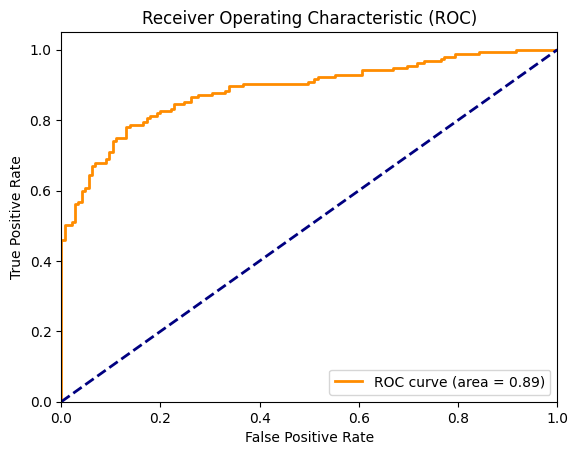

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

# Generate synthetic dataset
x, y = make_classification(n_samples=1000, n_features=20, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

# Predict probabilities of the positive class
y_prob = naive_bayes.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.utils import resample
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Method 1: Data Preprocessing
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Method 2: Feature Selection
k_best = SelectKBest(score_func=f_classif, k=2)
x_train_selected = k_best.fit_transform(x_train_scaled, y_train)
x_test_selected = k_best.transform(x_test_scaled)

# Method 3: Cross-Validation
gnb = GaussianNB()
cv_scores = cross_val_score(gnb, x_train_selected, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Method 4: Parameter Tuning
param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}
grid_search = GridSearchCV(gnb, param_grid, cv=5)
grid_search.fit(x_train_selected, y_train)
best_gnb = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

# Method 6: Handling Multicollinearity
variance_selector = VarianceThreshold(threshold=0.01)
x_train_filtered = variance_selector.fit_transform(x_train_scaled)
x_test_filtered = variance_selector.transform(x_test_scaled)

# Final GaussianNB classifier with the best parameters
gnb_final = GaussianNB(var_smoothing=best_gnb.get_params()['var_smoothing'])
gnb_final.fit(x_train_balanced, y_train_balanced)

# Predict on the test set
y_pred = gnb_final.predict(x_test_selected)  # Use X_test_selected instead of X_test_filtered

# Calculate accuracy score on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)




Cross-validation scores: [0.85105406 0.84393515 0.84239655 0.84253072 0.84223217]
Mean CV accuracy: 0.8444297283924538
Best parameters: {'var_smoothing': 1.0}
Best CV accuracy: 0.8567616476265082
Test set accuracy: 0.8023956496178718


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 2: Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Feature selection using SelectKBest with ANOVA F-test
k_best = 3  # You can adjust this number based on your preference
feature_selector = SelectKBest(score_func=f_classif, k=k_best)
X_train_selected = feature_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = feature_selector.transform(X_test_scaled)

# Step 4: Create a base Gaussian Naive Bayes classifier
base_classifier = GaussianNB()

# Step 5: Create the BaggingClassifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Step 6: Create the GradientBoostingClassifier
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Step 7: Train the GradientBoostingClassifier
gradient_boosting_classifier.fit(X_train_selected, y_train)

# Step 8: Evaluate the model using cross-validation
accuracy_scores = cross_val_score(gradient_boosting_classifier, X_train_selected, y_train, cv=5)
average_accuracy = np.mean(accuracy_scores)

print("Accuracy after applying feature scaling, selection, bagging, and gradient boosting:")
print(f"Average accuracy: {average_accuracy:.2f}")


Accuracy after applying feature scaling, selection, bagging, and gradient boosting:
Average accuracy: 0.86


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 2: Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Feature selection using SelectKBest with ANOVA F-test
k_best = 3  # You can adjust this number based on your preference
feature_selector = SelectKBest(score_func=f_classif, k=k_best)
X_train_selected = feature_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = feature_selector.transform(X_test_scaled)

# Step 4: Create a base Gaussian Naive Bayes classifier
base_classifier = GaussianNB()

# Step 5: Create the BaggingClassifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Step 6: Create the GradientBoostingClassifier
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Step 7: Create the RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 8: Create the Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Step 9: Create the K-nearest Neighbors (KNN) Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Step 10: Train and evaluate the models

classifiers = [
    ("Gaussian Naive Bayes", base_classifier),
    ("Bagging", bagging_classifier),
    ("Gradient Boosting", gradient_boosting_classifier),
    ("Random Forest", random_forest_classifier),
    ("Support Vector Machine (SVM)", svm_classifier),
    ("K-nearest Neighbors (KNN)", knn_classifier)
]

for name, classifier in classifiers:
    classifier.fit(X_train_selected, y_train)
    accuracy_scores = cross_val_score(classifier, X_train_selected, y_train, cv=5)
    average_accuracy = np.mean(accuracy_scores)
    print(f"Accuracy for {name}: {average_accuracy:.2f}")


Accuracy for Gaussian Naive Bayes: 0.84
Accuracy for Bagging: 0.85
Accuracy for Gradient Boosting: 0.86
Accuracy for Random Forest: 0.86
Accuracy for Support Vector Machine (SVM): 0.86
Accuracy for K-nearest Neighbors (KNN): 0.84


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE


# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 2: Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Feature selection using SelectKBest with ANOVA F-test
k_best = 3  # You can adjust this number based on your preference
feature_selector = SelectKBest(score_func=f_classif, k=k_best)
X_train_selected = feature_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = feature_selector.transform(X_test_scaled)

# Step 4: Create a base Gaussian Naive Bayes classifier
base_classifier = GaussianNB()

# Step 5: Create the BaggingClassifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Step 6: Create the GradientBoostingClassifier
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Step 7: Create the RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 8: Create the Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Step 9: Create the K-nearest Neighbors (KNN) Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Step 10: Perform Principal Component Analysis (PCA) for dimensionality reduction
pca = PCA(n_components=3)  # You can adjust the number of components based on your preference
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)

# Step 11: Handle class imbalances using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)

# Step 12: Train and evaluate the models

classifiers = [
    ("Gaussian Naive Bayes", base_classifier),
    ("Bagging", bagging_classifier),
    ("Gradient Boosting", gradient_boosting_classifier),
    ("Random Forest", random_forest_classifier),
    ("Support Vector Machine (SVM)", svm_classifier),
    ("K-nearest Neighbors (KNN)", knn_classifier)
]

for name, classifier in classifiers:
    classifier.fit(X_train_resampled, y_train_resampled)
    accuracy_scores = cross_val_score(classifier, X_train_resampled, y_train_resampled, cv=5)
    average_accuracy = np.mean(accuracy_scores)
    print(f"Accuracy for {name}: {average_accuracy:.2f}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt



# Step 2: Split the dataset into training and testing sets
def split_dataset(X, y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Step 3: Apply feature scaling
def apply_feature_scaling(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Step 4: Feature selection using SelectKBest and ANOVA F-value
def feature_selection(X_train, X_test, y_train, k=10):
    selector = SelectKBest(f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    return X_train_selected, X_test_selected

# Step 5: Train and test the Gaussian Naive Bayes model
def train_gaussian_nb(X_train, X_test, y_train, y_test):
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Step 6: Hyperparameter tuning for Gaussian Naive Bayes (optional)
def tune_gaussian_nb(X_train, X_test, y_train, y_test):
    # Define the hyperparameter grid for Gaussian Naive Bayes (e.g., priors)
    param_grid = {
        # Define hyperparameters and their possible values here
        'priors': [None, [0.1, 0.9], [0.3, 0.7]],
    }
    # Create and fit the GridSearchCV object
    grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    best_accuracy = accuracy_score(y_test, y_pred)
    return best_accuracy

# Step 7: Try an ensemble method - Random Forest
def train_random_forest(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Step 8: Try another ensemble method - AdaBoost
def train_adaboost(X_train, X_test, y_train, y_test):
    model = AdaBoostClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

if __name__ == "__main__":
    X_train, X_test, y_train, y_test = split_dataset(x, y)
    X_train_scaled, X_test_scaled = apply_feature_scaling(X_train, X_test)
    X_train_selected, X_test_selected = feature_selection(X_train_scaled, X_test_scaled, y_train, k=10)

    # Approach Flow:
    # 1. Load and preprocess the dataset
    # 2. Split the dataset into training and testing sets
    # 3. Apply feature scaling
    # 4. Feature selection using SelectKBest and ANOVA F-value
    # 5. Train and test the Gaussian Naive Bayes model
    # 6. Hyperparameter tuning for Gaussian Naive Bayes (optional)
    # 7. Try an ensemble method - Random Forest
    # 8. Try another ensemble method - AdaBoost

    # Train and evaluate Gaussian Naive Bayes model
    accuracy_gaussian_nb = train_gaussian_nb(X_train_selected, X_test_selected, y_train, y_test)
    print("Accuracy using Gaussian Naive Bayes:", accuracy_gaussian_nb)

    # Hyperparameter tuning for Gaussian Naive Bayes (optional)
    best_accuracy_gaussian_nb = tune_gaussian_nb(X_train_selected, X_test_selected, y_train, y_test)
    print("Best Accuracy using Gaussian Naive Bayes (after tuning):", best_accuracy_gaussian_nb)

    # Train and evaluate Random Forest model
    accuracy_random_forest = train_random_forest(X_train_selected, X_test_selected, y_train, y_test)


Accuracy using Gaussian Naive Bayes: 0.1413506760728983
Best Accuracy using Gaussian Naive Bayes (after tuning): 0.1413506760728983


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 2: Min-Max Scaling (instead of Standardization)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Feature Selection
k_features = 2  # Change this value to select the desired number of features
selector = SelectKBest(score_func=chi2, k=k_features)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# Step 4: SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Step 5: Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Step 6: Predictions and Evaluation
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7778328924162258
Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.11      0.13      7693
           1       0.86      0.89      0.87     46739

    accuracy                           0.78     54432
   macro avg       0.50      0.50      0.50     54432
weighted avg       0.76      0.78      0.77     54432

Confusion Matrix:
[[  883  6810]
 [ 5283 41456]]


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Assume you have your data loaded into X and y (features and labels).

# Step 1: Data Preprocessing
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Feature Selection
# You can use SelectKBest with the f_classif score function to select the top k features.
selector = SelectKBest(f_classif, k=10)  # Choose k as per your dataset's characteristics
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# Step 3: Create and Train the Gaussian Naive Bayes Classifier
gnb = GaussianNB()

# Step 4: Hyperparameter Tuning (Optional)
# If you want to perform hyperparameter tuning, you can use GridSearchCV.
# Define the parameter grid to search for the best hyperparameters.
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Adjust the range as per your requirement
}

# Create the GridSearchCV object
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy')

# Fit the classifier to the training data with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best classifier after hyperparameter tuning
gnb_best = grid_search.best_estimator_

# Step 5: Evaluate the Model
# Make predictions on the test set
y_pred = gnb_best.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 85.87%
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7693
           1       0.86      1.00      0.92     46739

    accuracy                           0.86     54432
   macro avg       0.43      0.50      0.46     54432
weighted avg       0.74      0.86      0.79     54432



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, make_scorer,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Assume you have your data loaded into X and y (features and labels).

# Step 1: Data Preprocessing
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Feature Selection
# You can use SelectKBest with the f_classif score function to select the top k features.
selector = SelectKBest(f_classif, k=10)  # Choose k as per your dataset's characteristics
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# Step 3: Create and Train the Gaussian Naive Bayes Classifier
gnb = GaussianNB()

# Step 4: Hyperparameter Tuning (Optional)
# If you want to perform hyperparameter tuning, you can use GridSearchCV.
# Define the parameter grid to search for the best hyperparameters.
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Adjust the range as per your requirement
}

# Create the GridSearchCV object
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy')

# Fit the classifier to the training data with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best classifier after hyperparameter tuning
gnb_best = grid_search.best_estimator_

# Get the best threshold value (assuming you have a binary classification problem)
best_threshold = 0.5  # Default threshold
if hasattr(gnb_best, 'predict_proba'):
    # If the classifier supports predict_proba, choose a threshold based on F1-score
    y_pred_proba = gnb_best.predict_proba(X_test)[:, 1]
    thresholds = np.linspace(0, 1, 100)
    f1_scores = [f1_score(y_test, y_pred_proba >= t) for t in thresholds]
    best_threshold = thresholds[np.argmax(f1_scores)]

# Step 5: Evaluate the Model
# Make predictions on the test set using the best threshold
y_pred = (gnb_best.predict_proba(X_test)[:, 1] >= best_threshold).astype(int)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Best Threshold: {:.2f}".format(best_threshold))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 85.87%
Best Threshold: 0.00
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7693
           1       0.86      1.00      0.92     46739

    accuracy                           0.86     54432
   macro avg       0.43      0.50      0.46     54432
weighted avg       0.74      0.86      0.79     54432



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SGD

In [ ]:
# Import necessary libraries
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create an instance of the SGDClassifier
sgd_clf = SGDClassifier()

# Train the classifier on the training data
sgd_clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = sgd_clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8586676954732511


In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler

# Assuming you have imported necessary libraries and loaded your cleaned data into X_train, y_train, X_test, y_test.

# Feature Scaling (using Min-Max Scaling)
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Model Architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=x_train_scaled.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Optimizer
sgd_optimizer = SGD(lr=0.01)  # Set the learning rate here

model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with mini-batch gradient descent
batch_size = 64
model.fit(x_train_scaled, y_train, epochs=10, batch_size=batch_size, verbose=1)

# Evaluate the model's accuracy on the test set
accuracy = model.evaluate(x_test_scaled, y_test)[1]
print("Test Accuracy:", accuracy)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3402/3402 [==============================] - 12s 2ms/step - loss: 0.4175 - accuracy: 0.8552
Epoch 2/10
3402/3402 [==============================] - 7s 2ms/step - loss: 0.4111 - accuracy: 0.8568
Epoch 3/10
3402/3402 [==============================] - 8s 2ms/step - loss: 0.4109 - accuracy: 0.8568
Epoch 4/10
3402/3402 [==============================] - 8s 2ms/step - loss: 0.4108 - accuracy: 0.8568
Epoch 5/10
3402/3402 [==============================] - 7s 2ms/step - loss: 0.4107 - accuracy: 0.8568
Epoch 6/10
3402/3402 [==============================] - 8s 2ms/step - loss: 0.4107 - accuracy: 0.8568
Epoch 7/10
3402/3402 [==============================] - 7s 2ms/step - loss: 0.4106 - accuracy: 0.8568
Epoch 8/10
3402/3402 [==============================] - 8s 2ms/step - loss: 0.4106 - accuracy: 0.8568
Epoch 9/10
3402/3402 [==============================] - 7s 2ms/step - loss: 0.4106 - accuracy: 0.8568
Epoch 10/10
1701/1701 [==============================] - 3s 2ms/step - loss: 0.4070 - accura

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


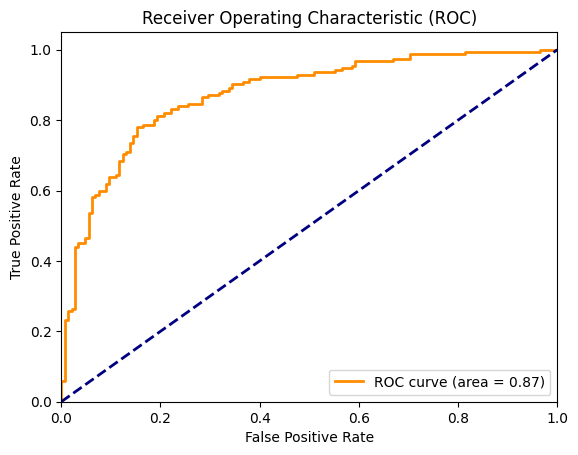

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, auc

# Generate synthetic dataset
x, y = make_classification(n_samples=1000, n_features=20, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train the SGD classifier
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train, y_train)

# Predict probabilities of the positive class
y_prob = sgd.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Checking correlation with various methods

In [ ]:
df= df.drop(['Datetime'], axis = 1)

In [ ]:
import numpy as np
from scipy import stats

# Assume you have two numerical variables x and y.
# Replace 'x' and 'y' with the actual column names from your dataset.

# Generate example data
for i in df.columns:
  a = df[i]
  b = df["Fault Detection Ground Truth"]
  # Calculate Pearson correlation coefficient and p-value
  corr_coef, p_value = stats.pearsonr(a, b)

  # Print the results
  print("Pearson correlation coefficient:", corr_coef)
  print("P-value:", p_value)

  # Interpret th e results
  if p_value < 0.05:
      print("There is a statistically significant linear correlation between x and y.")
  else:
      print("There is no statistically significant linear correlation between x and y.")


Pearson correlation coefficient: 0.01513624213833372
P-value: 2.860732732181348e-15
There is a statistically significant linear correlation between x and y.
Pearson correlation coefficient: 4.465613809290225e-09
P-value: 0.9999981412054479
There is no statistically significant linear correlation between x and y.
Pearson correlation coefficient: 0.002174648051903788
P-value: 0.25659018866524497
There is no statistically significant linear correlation between x and y.
Pearson correlation coefficient: 0.002946011026689087
P-value: 0.1243179267494068
There is no statistically significant linear correlation between x and y.
Pearson correlation coefficient: -0.0002010143496754486
P-value: 0.9164816560857821
There is no statistically significant linear correlation between x and y.
Pearson correlation coefficient: -0.0002010143496754486
P-value: 0.9164816560857821
There is no statistically significant linear correlation between x and y.
Pearson correlation coefficient: 0.00016513003042563758
P

In [ ]:
df.columns

Index(['Datetime', 'AHU: Supply Air Temperature',
       'AHU: Outdoor Air Temperature', 'AHU: Mixed Air Temperature',
       'AHU: Return Air Temperature', 'AHU: Supply Air Fan Status',
       'AHU: Return Air Fan Status',
       'AHU: Supply Air Fan Speed Control Signal',
       'AHU: Return Air Fan Speed Control Signal',
       'AHU: Outdoor Air Damper Control Signal  ',
       'AHU: Return Air Damper Control Signal',
       'AHU: Cooling Coil Valve Control Signal',
       'AHU: Heating Coil Valve Control Signal', 'Occupancy Mode Indicator',
       'Fault Detection Ground Truth'],
      dtype='object')